# Pattern matching for $k$-track permutations

# Preambule

### Imports

In [129]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

In [130]:
import seaborn as sns
sns.set_context("poster")
sns.set(font_scale=3.0, rc={'text.usetex' : True})
#sns.set(font='serif')
sns.set_style("white", {"font.family": "serif", "font.serif": ["Times", "Palatino", "serif"]})
sns.set_style("whitegrid")

### Auxiliary functions

In [131]:
def string_to_int(x):
    """Convert a string to int.
    """
    return int(x)

In [132]:
def format_duration(x):
    """Duration in ms.
    """
    (prefix, suffix)=x.split(' ')
    try:
        val = float(prefix)
        if suffix == 'ms' or suffix == 'm':
            return val
        elif suffix == 's':
            #print("x={}, prefix=(), suffix={}".format(x, prefix, suffix))
            return val * 1000
        elif suffix == 'µs':
            return val / 1000
        elif suffix == "h":
            #print("x={}, prefix=(), suffix={}".format(x, prefix, suffix))
            return val * 60 * 60 * 1000
        else: 
            print("prefix=-{}- suffix=-{}-".format(prefix, suffix))
            raise ValueError()
    except:
        raise

In [133]:
def format_strategy(s):
    """Shorter names for strategys.
    """
    try:
        if s == 'leftmost conflict first':
            return 'leftmost conflict first'
        elif s == 'leftmost horizontal conflict first':
            return 'leftmost horizontal conflict first'
        elif s == 'leftmost vertical conflict first':
            return 'leftmost vertical conflict first'
        elif s == 'rightmost conflict first':
            return 'rightmost conflict first'
        elif s == 'rightmost horizontal conflict first':
            return 'rightmost horizontal conflict first'
        elif s == 'rightmost vertical conflict first':
            return 'rightmost vertical conflict first'
    except:
        raise

In [134]:
from os import listdir
from os.path import isfile, join

def benchmark_files(prefix, path="../data/"):
    """Return the list of all benchmak files.
    """
    #return [f for f in listdir(path) if isfile(join(path, f)) if f.startswith("ppattern-split-benchmark-") if f.endswith(".csv")]
    return [f for f in listdir(path) if isfile(join(path, f)) if f.startswith(prefix) if f.endswith(".csv")] 

## Report running time

### Reading and parsing benchmarks

In [135]:
df_benchmarks = {}
for f in all_split_benchmark_files():
    # parse cvs benchmark file
    #  m:         pattern size
    #  n:         permutation size
    #  k:         pattern is the union of at most k increasings
    #  l:         permutation is the union of at most l increasings
    #  p:         pattern
    #  q:         permutation
    #  embedding: solution
    #  strategy:  conflict selection strategy
    #  duration:  running time
    print(f)
    df_benchmark = pd.read_csv("../data/" + f, names = ['m', 'n', 'k', 'l', 'p', 'q', 'embedding', 'strategy', 'duration'])
    
    # convert string int to int
    df_benchmark['m'] = df_benchmark['m'].apply(lambda m: string_to_int(m))
    df_benchmark['n'] = df_benchmark['n'].apply(lambda n: string_to_int(n))
    df_benchmark['k'] = df_benchmark['k'].apply(lambda k: string_to_int(k))
    df_benchmark['l'] = df_benchmark['l'].apply(lambda l: string_to_int(l))
    
    # time in ms
    df_benchmark['duration'] = df_benchmark['duration'].apply(lambda x: format_duration(x))
    
    # shorter names for strategys
    #df_benchmark['strategy'] = df_benchmark['strategy'].apply(lambda s: format_strategy(s))

    # drop p column
    #df_benchmark = df_benchmark.drop('p', 1)
    
    # drop q column
    #df_benchmark = df_benchmark.drop('q', 1)
    
    # drop embedding column
    #df_benchmark = df_benchmark.drop('embedding', 1)
    
    # split and add to the collection
    splitter = f.split('-')
    m = splitter[3].zfill(2)
    n = splitter[5].zfill(2)
    k = splitter[7].zfill(2)
    l = splitter[9].split('.')[0].zfill(2) # another split to remove the .csv suffix
    df_benchmarks[(m, n, k, l)] = df_benchmark

ppattern-benchmark-psize-10-qsize-200-psplit-2-qsplit-2.csv
ppattern-benchmark-psize-10-qsize-200-psplit-2-qsplit-3.csv
ppattern-benchmark-psize-10-qsize-200-psplit-2-qsplit-4.csv
ppattern-benchmark-psize-10-qsize-200-psplit-3-qsplit-3.csv
ppattern-benchmark-psize-10-qsize-200-psplit-3-qsplit-4.csv
ppattern-benchmark-psize-10-qsize-200-psplit-3-qsplit-5.csv
ppattern-benchmark-psize-10-qsize-200-psplit-4-qsplit-4.csv
ppattern-benchmark-psize-10-qsize-200-psplit-4-qsplit-5.csv
ppattern-benchmark-psize-10-qsize-200-psplit-4-qsplit-6.csv
ppattern-benchmark-psize-10-qsize-200-psplit-5-qsplit-5.csv
ppattern-benchmark-psize-10-qsize-200-psplit-5-qsplit-6.csv
ppattern-benchmark-psize-10-qsize-200-psplit-5-qsplit-7.csv
ppattern-benchmark-psize-10-qsize-200-psplit-6-qsplit-6.csv
ppattern-benchmark-psize-10-qsize-200-psplit-6-qsplit-7.csv
ppattern-benchmark-psize-10-qsize-200-psplit-6-qsplit-8.csv
ppattern-benchmark-psize-12-qsize-200-psplit-2-qsplit-2.csv
ppattern-benchmark-psize-12-qsize-200-ps

In [136]:
w = df_benchmarks[('18', '200', '06', '08')].sort(['duration'], ascending=[0])

print(w.iloc[0])
print()
print(w.iloc[0].p)
print(w.iloc[0].q)
print()
print(w.iloc[1].p)
print(w.iloc[1].q)
print()
print(w.iloc[2].p)
print(w.iloc[2].q)
print()
print(w.iloc[3].p)
print(w.iloc[3].q)
print()

m                                                           18
n                                                          200
k                                                            6
l                                                            8
p               [8,12,18,10,7,1,2,3,4,5,6,9,11,13,14,15,16,17]
q            [2,1,12,9,3,13,20,6,10,16,18,26,4,40,48,7,38,5...
embedding    Just Point (1,8) -> Point (41,93), Point (2,12...
strategy                   rightmost horizontal conflict first
duration                                                 59810
Name: 16888, dtype: object

[8,12,18,10,7,1,2,3,4,5,6,9,11,13,14,15,16,17]
[2,1,12,9,3,13,20,6,10,16,18,26,4,40,48,7,38,57,23,36,44,17,63,8,42,75,11,43,24,5,50,54,70,28,30,34,45,83,77,51,93,14,22,15,37,27,29,72,39,59,79,94,19,98,31,55,41,110,125,73,74,97,106,32,107,142,157,114,122,188,196,58,49,56,64,163,135,69,90,136,145,65,47,160,169,197,21,99,71,166,25,60,82,33,121,138,85,61,168,170,183,159,200,165,191,186,67,86,68,35,46,52,76

/Users/vialette/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [137]:
# show all benchmarks
print(df_benchmarks)
for key in sorted(df_benchmarks):
    print(key)
    print(df_benchmarks[key].describe())
    print()

{('12', '200', '04', '04'):         m    n  k  l                             p  \
0      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
1      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
2      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
3      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
4      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
5      12  200  4  4  [4,5,10,1,2,3,6,7,8,9,11,12]   
6      12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
7      12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
8      12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
9      12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
10     12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
11     12  200  4  4  [4,2,1,3,5,7,11,8,9,6,10,12]   
12     12  200  4  4  [12,1,2,8,3,4,6,5,7,9,10,11]   
13     12  200  4  4  [12,1,2,8,3,4,6,5,7,9,10,11]   
14     12  200  4  4  [12,1,2,8,3,4,6,5,7,9,10,11]   
15     12  200  4  4  [12,1,2,8,3,4,6,5,7,9,10,11]   
16     12  200  4  4  [12,1,2,8,3,4,6,5,7,9,10,11]   


Concat pandas data frames by pattern size.

### Reporting benchmarks by pattern size and split parameter.

In [138]:
keys = df_benchmarks.keys()
ms = sorted(list(set(key[0] for key in keys)))
ns = sorted(list(set(key[1] for key in keys)))
ks = sorted(list(set(key[2] for key in keys)))
ls = sorted(list(set(key[3] for key in keys)))

print(ms)
print(ns)
print(ks)
print(ls)

['10', '12', '14', '16', '18', '20']
['200']
['02', '03', '04', '05', '06']
['02', '03', '04', '05', '06', '07', '08']


i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


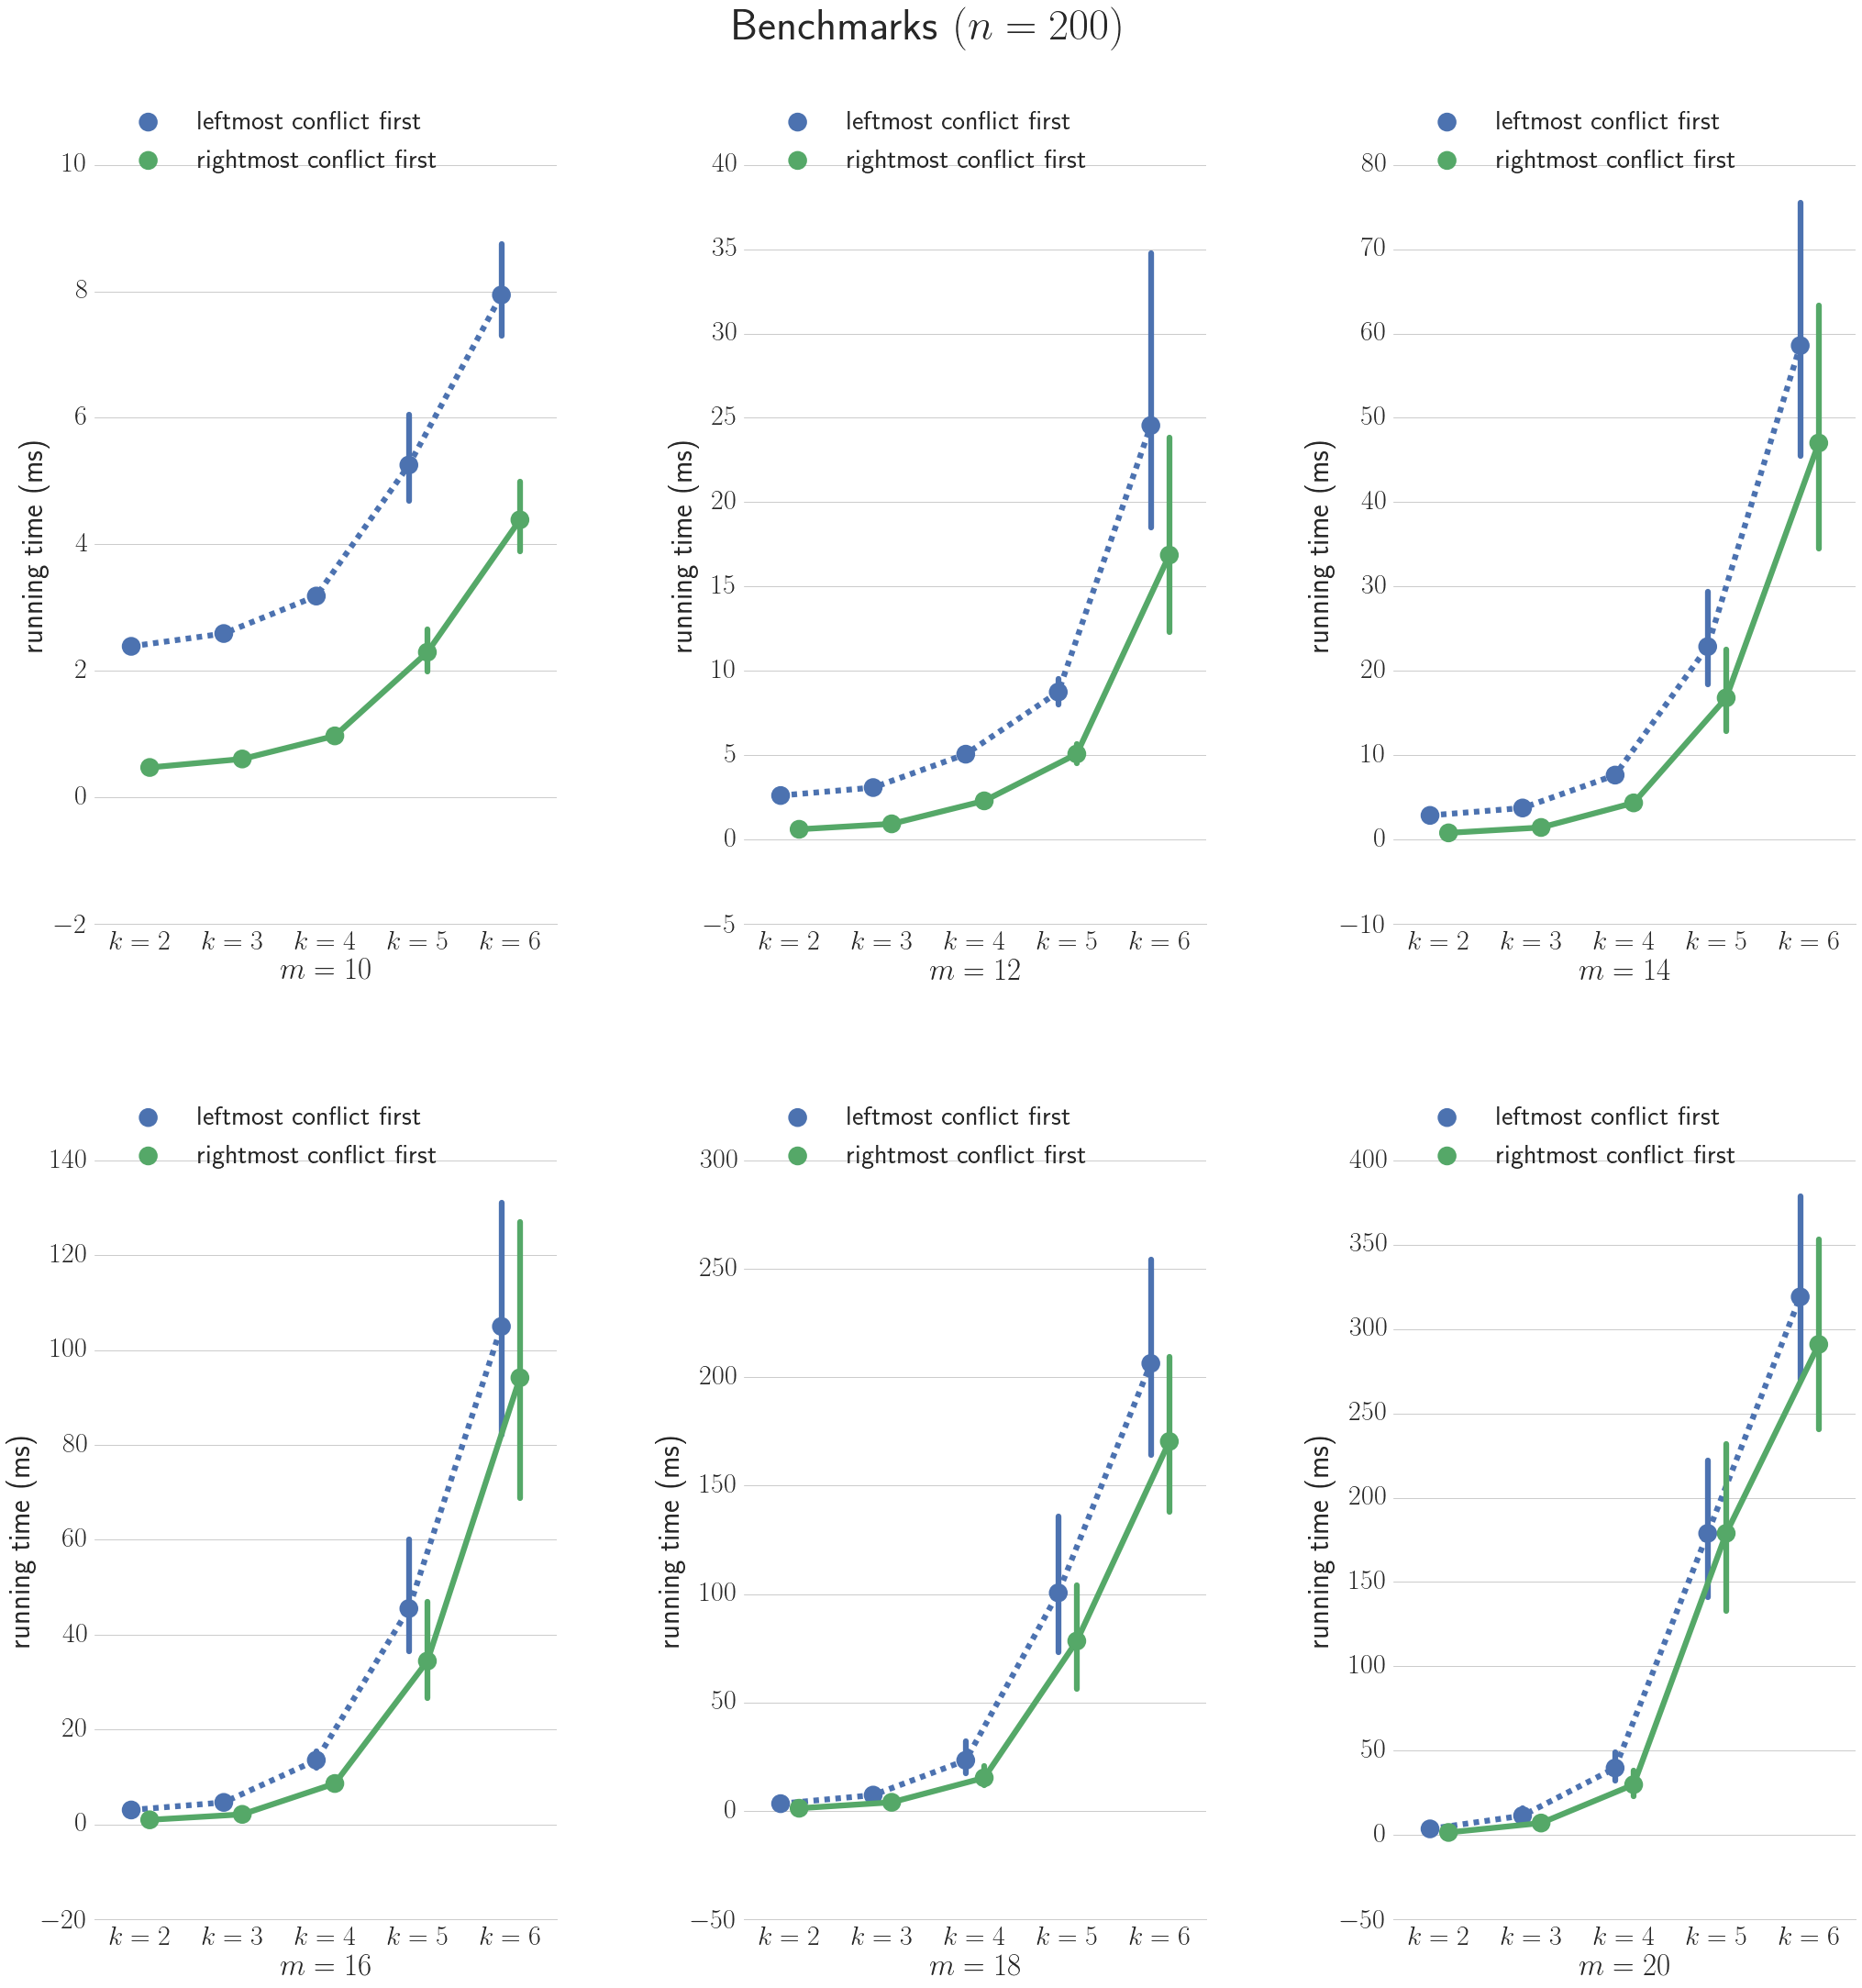

In [139]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['leftmost conflict first', 'rightmost conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.2, join=True, markers=["o", "o"], linestyles=["--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks', m, n])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)


In [140]:
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

ttest_inds = {}
ttest_rels = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_conflict_first  = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost conflict first']
        df_rightmost_conflict_first = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost conflict first']
        
        # Perform the t-test
        ttest_inds[(m, k)] = ttest_ind(df_leftmost_conflict_first['duration'].values, 
                                       df_rightmost_conflict_first['duration'].values)
        ttest_rels[(m, k)] = ttest_rel(df_leftmost_conflict_first['duration'].values, 
                                       df_rightmost_conflict_first['duration'].values)
                    

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 3, 4, 5, 6]


In [141]:
for (m, k) in ttest_inds:
    t_statistic = ttest_inds[(m, k)][0]
    p_value     = ttest_inds[(m, k)][1]
    print("m={}, k={}, t-statistic={}, pvalue={}".format(m, k, t_statistic, p_value))

m=16, k=6, t-statistic=0.8918949837224786, pvalue=0.3724578221603072
m=10, k=4, t-statistic=12.396269785318813, pvalue=3.4755807505834867e-35
m=20, k=3, t-statistic=1.8709960911538577, pvalue=0.06135731426435846
m=16, k=4, t-statistic=1.949352852345295, pvalue=0.05126448628051585
m=14, k=4, t-statistic=1.8938295408200378, pvalue=0.05825919202436933
m=10, k=6, t-statistic=7.031699208101973, pvalue=2.0929000137609283e-12
m=16, k=2, t-statistic=2.201763690337873, pvalue=0.027691120448598224
m=14, k=6, t-statistic=1.5256203912700617, pvalue=0.12711710207361598
m=12, k=5, t-statistic=3.4109674295347996, pvalue=0.0006483536121821862
m=18, k=6, t-statistic=1.2597497996112315, pvalue=0.20777141406678662
m=20, k=5, t-statistic=0.6639222246912413, pvalue=0.5067462238885252
m=18, k=3, t-statistic=1.7349933824184798, pvalue=0.0827543219607814
m=14, k=2, t-statistic=3.870948923537679, pvalue=0.00010868842291487506
m=10, k=3, t-statistic=31.933928396565605, pvalue=2.338270806128081e-219
m=12, k=2, t

In [142]:
for (m, k) in sorted(ttest_rels):
    t_statistic = ttest_rels[(m, k)][0]
    p_value     = ttest_rels[(m, k)][1]
    print("m={}, k={}, t-statistic={}, pvalue={}".format(m, k, t_statistic, p_value))

m=10, k=2, t-statistic=257.45518695593546, pvalue=0.0
m=10, k=3, t-statistic=145.6138928273457, pvalue=0.0
m=10, k=4, t-statistic=42.918203673384795, pvalue=0.0
m=10, k=5, t-statistic=30.29475124034479, pvalue=1.3543840017845128e-194
m=10, k=6, t-statistic=33.426568082413915, pvalue=1.0569994367673924e-234
m=12, k=2, t-statistic=123.84047319971725, pvalue=0.0
m=12, k=3, t-statistic=43.07562222991586, pvalue=0.0
m=12, k=4, t-statistic=22.36810808460948, pvalue=1.0856827441089808e-108
m=12, k=5, t-statistic=16.78483401570612, pvalue=1.5263615290689374e-62
m=12, k=6, t-statistic=15.727534081846972, pvalue=3.316451134759789e-55
m=14, k=2, t-statistic=32.49919605491964, pvalue=1.7687018031439548e-222
m=14, k=3, t-statistic=16.621008256889336, pvalue=2.239731031821949e-61
m=14, k=4, t-statistic=3.55017206396905, pvalue=0.0003863960789286465
m=14, k=5, t-statistic=11.777764800138877, pvalue=7.492682917288037e-32
m=14, k=6, t-statistic=8.219392120264143, pvalue=2.2464907389042383e-16
m=16, k=2

In [143]:
def t_statistics_row(t):
    return "\\begin{tabular}{@{}r@{}}" + str(round(t[0], 6)) + "\\\\" + '{:.5e}'.format(t[1]) + "\end{tabular}"

def t_statistics_to_latex(t):
    print("\\begin{tabular}{rrrrrr}")
    print("& \\multicolumn{5}{c}{$k$}    \\\\\cline{2-6}")
    print("$m$\quad & 2 & 3 & 4 & 5 & 6 \\\\\cline{2-6} \cline{2-6}")
    
    for m in sorted(m_values):
        a = [t_statistics_row(t[(m, k)]) for k in sorted(k_values)]
        print("{} \quad & ".format(m) + " & ".join(a) + "\\\\\cline{2-6}")
    print("\end{tabular}")

print(t_statistics_to_latex(ttest_rels))

\begin{tabular}{rrrrrr}
& \multicolumn{5}{c}{$k$}    \\\cline{2-6}
$m$\quad & 2 & 3 & 4 & 5 & 6 \\\cline{2-6} \cline{2-6}
10 \quad & \begin{tabular}{@{}r@{}}257.455187\\0.00000e+00\end{tabular} & \begin{tabular}{@{}r@{}}145.613893\\0.00000e+00\end{tabular} & \begin{tabular}{@{}r@{}}42.918204\\0.00000e+00\end{tabular} & \begin{tabular}{@{}r@{}}30.294751\\1.35438e-194\end{tabular} & \begin{tabular}{@{}r@{}}33.426568\\1.05700e-234\end{tabular}\\\cline{2-6}
12 \quad & \begin{tabular}{@{}r@{}}123.840473\\0.00000e+00\end{tabular} & \begin{tabular}{@{}r@{}}43.075622\\0.00000e+00\end{tabular} & \begin{tabular}{@{}r@{}}22.368108\\1.08568e-108\end{tabular} & \begin{tabular}{@{}r@{}}16.784834\\1.52636e-62\end{tabular} & \begin{tabular}{@{}r@{}}15.727534\\3.31645e-55\end{tabular}\\\cline{2-6}
14 \quad & \begin{tabular}{@{}r@{}}32.499196\\1.76870e-222\end{tabular} & \begin{tabular}{@{}r@{}}16.621008\\2.23973e-61\end{tabular} & \begin{tabular}{@{}r@{}}3.550172\\3.86396e-04\end{tabular} & \begin{tabu

i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


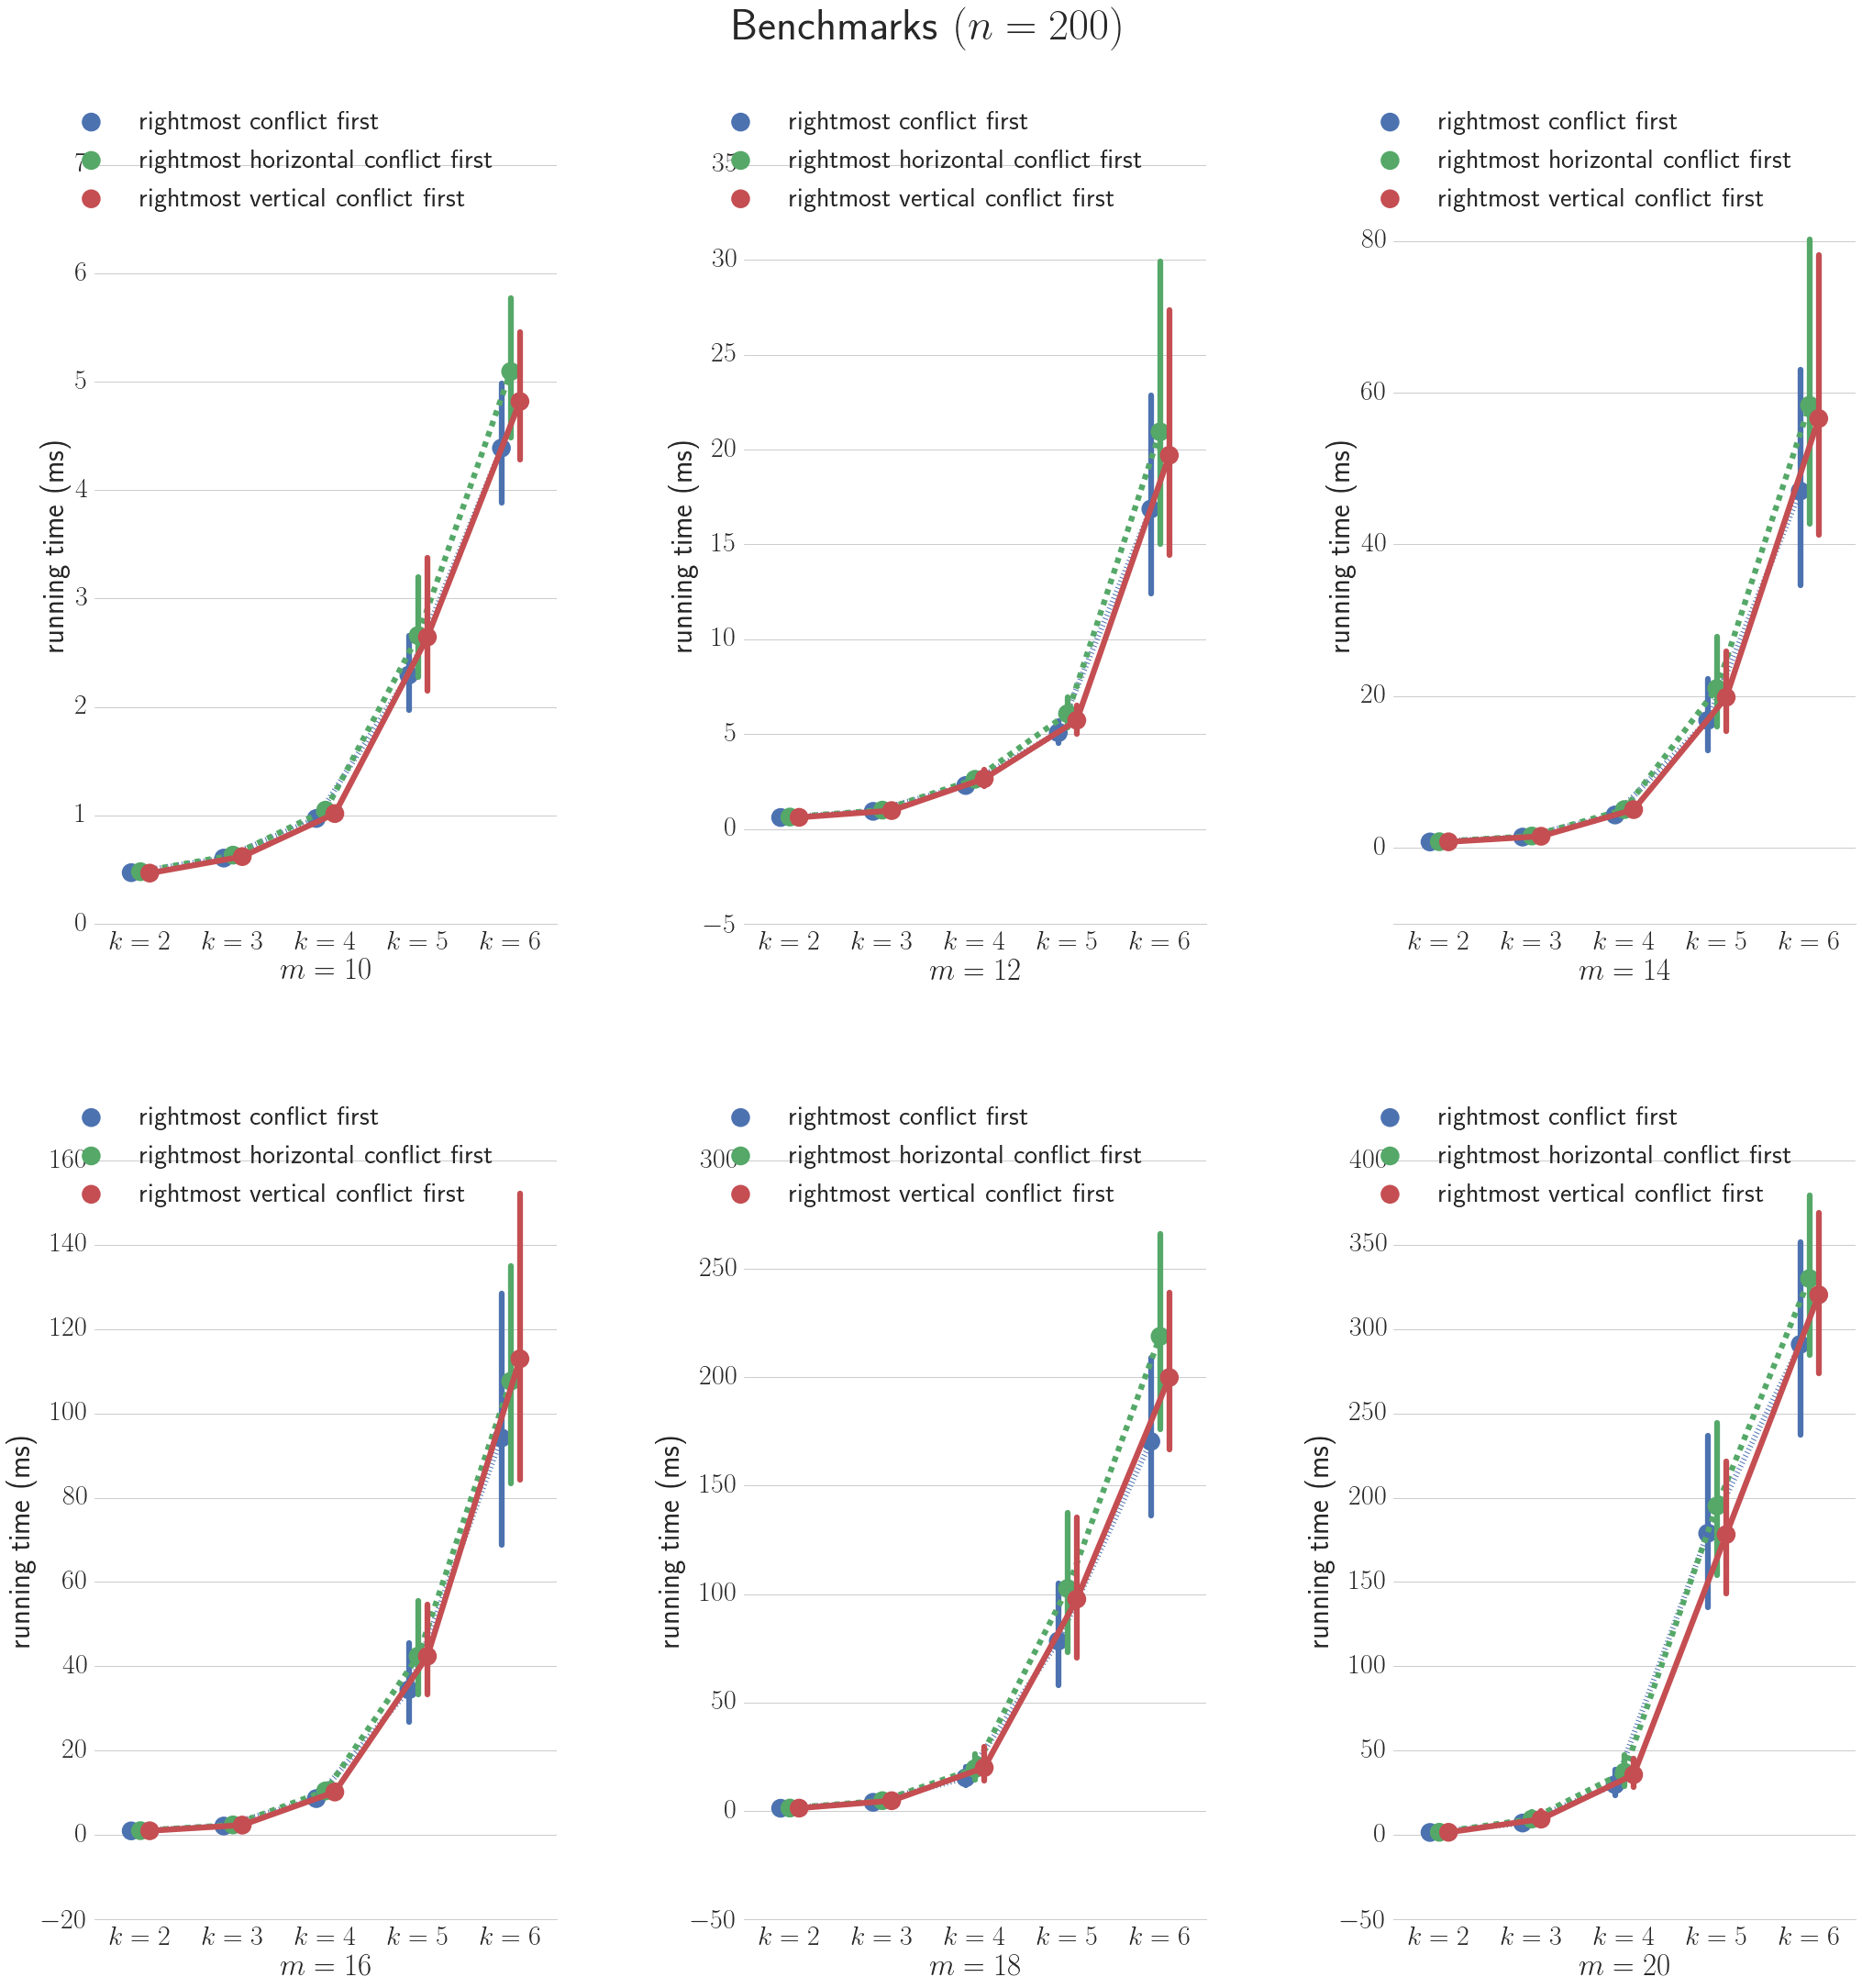

In [144]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['rightmost conflict first', 'rightmost horizontal conflict first', 'rightmost vertical conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.2, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-rightmost-conflict-first', str(m), str(n)])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [145]:
df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

anova = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_rightmost_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost conflict first']
        df_rightmost_horizontal_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost horizontal conflict first']
        df_rightmost_vertical_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'rightmost vertical conflict first']
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_rightmost_conflict_first_group['duration'].values,
                                       df_rightmost_horizontal_conflict_first_group['duration'].values, 
                                       df_rightmost_vertical_conflict_first_group['duration'].values
                                       )

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 3, 4, 5, 6]


In [146]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=16, k=6, pvalue=0.21836127068431374
m=10, k=4, pvalue=0.21821012339525636
m=20, k=3, pvalue=0.20369175134313547
m=16, k=4, pvalue=0.1700190289940907
m=14, k=4, pvalue=0.5225051084566241
m=10, k=6, pvalue=0.07475798075593725
m=16, k=2, pvalue=0.8378161174080206
m=14, k=6, pvalue=0.149855517298044
m=12, k=5, pvalue=0.19456047104722538
m=18, k=6, pvalue=0.010187214926053196
m=20, k=5, pvalue=0.1395861182086312
m=18, k=3, pvalue=0.418628625849916
m=14, k=2, pvalue=0.8891962842485108
m=10, k=3, pvalue=0.23498534602531884
m=12, k=2, pvalue=0.39405563545578093
m=10, k=5, pvalue=0.13600873080984482
m=16, k=5, pvalue=0.12797414115148914
m=14, k=5, pvalue=0.1462838452251787
m=20, k=2, pvalue=0.39093051411332747
m=16, k=3, pvalue=0.2118294068047641
m=18, k=2, pvalue=0.6168652698962831
m=18, k=4, pvalue=0.9611367453685472
m=12, k=6, pvalue=0.028838648803084607
m=12, k=4, pvalue=0.33057828102094083
m=20, k=6, pvalue=0.8749463391512737
m=14, k=3, pvalue=0.37971907326014276
m=20, k=4, pvalue=0.0537

In [147]:
def anova_row(t):
    return str(round(t[1], 6))

def anova_to_latex(t):
    print("\\begin{tabular}{rrrrrr}")
    print("& \\multicolumn{5}{c}{$k$}    \\\\\cline{2-6}")
    print("$m$\quad & 2 & 3 & 4 & 5 & 6 \\\\\cline{2-6} \cline{2-6}")
    
    for m in sorted(m_values):
        a = [anova_row(t[(m, k)]) for k in sorted(k_values)]
        print("{} \quad & ".format(m) + " & ".join(a) + "\\\\\cline{2-6}")
    print("\end{tabular}")

print(anova_to_latex(anova))

\begin{tabular}{rrrrrr}
& \multicolumn{5}{c}{$k$}    \\\cline{2-6}
$m$\quad & 2 & 3 & 4 & 5 & 6 \\\cline{2-6} \cline{2-6}
10 \quad & 0.23299 & 0.234985 & 0.21821 & 0.136009 & 0.074758\\\cline{2-6}
12 \quad & 0.394056 & 0.193947 & 0.330578 & 0.19456 & 0.028839\\\cline{2-6}
14 \quad & 0.889196 & 0.379719 & 0.522505 & 0.146284 & 0.149856\\\cline{2-6}
16 \quad & 0.837816 & 0.211829 & 0.170019 & 0.127974 & 0.218361\\\cline{2-6}
18 \quad & 0.616865 & 0.418629 & 0.961137 & 0.040501 & 0.010187\\\cline{2-6}
20 \quad & 0.390931 & 0.203692 & 0.053736 & 0.139586 & 0.874946\\\cline{2-6}
\end{tabular}
None


i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


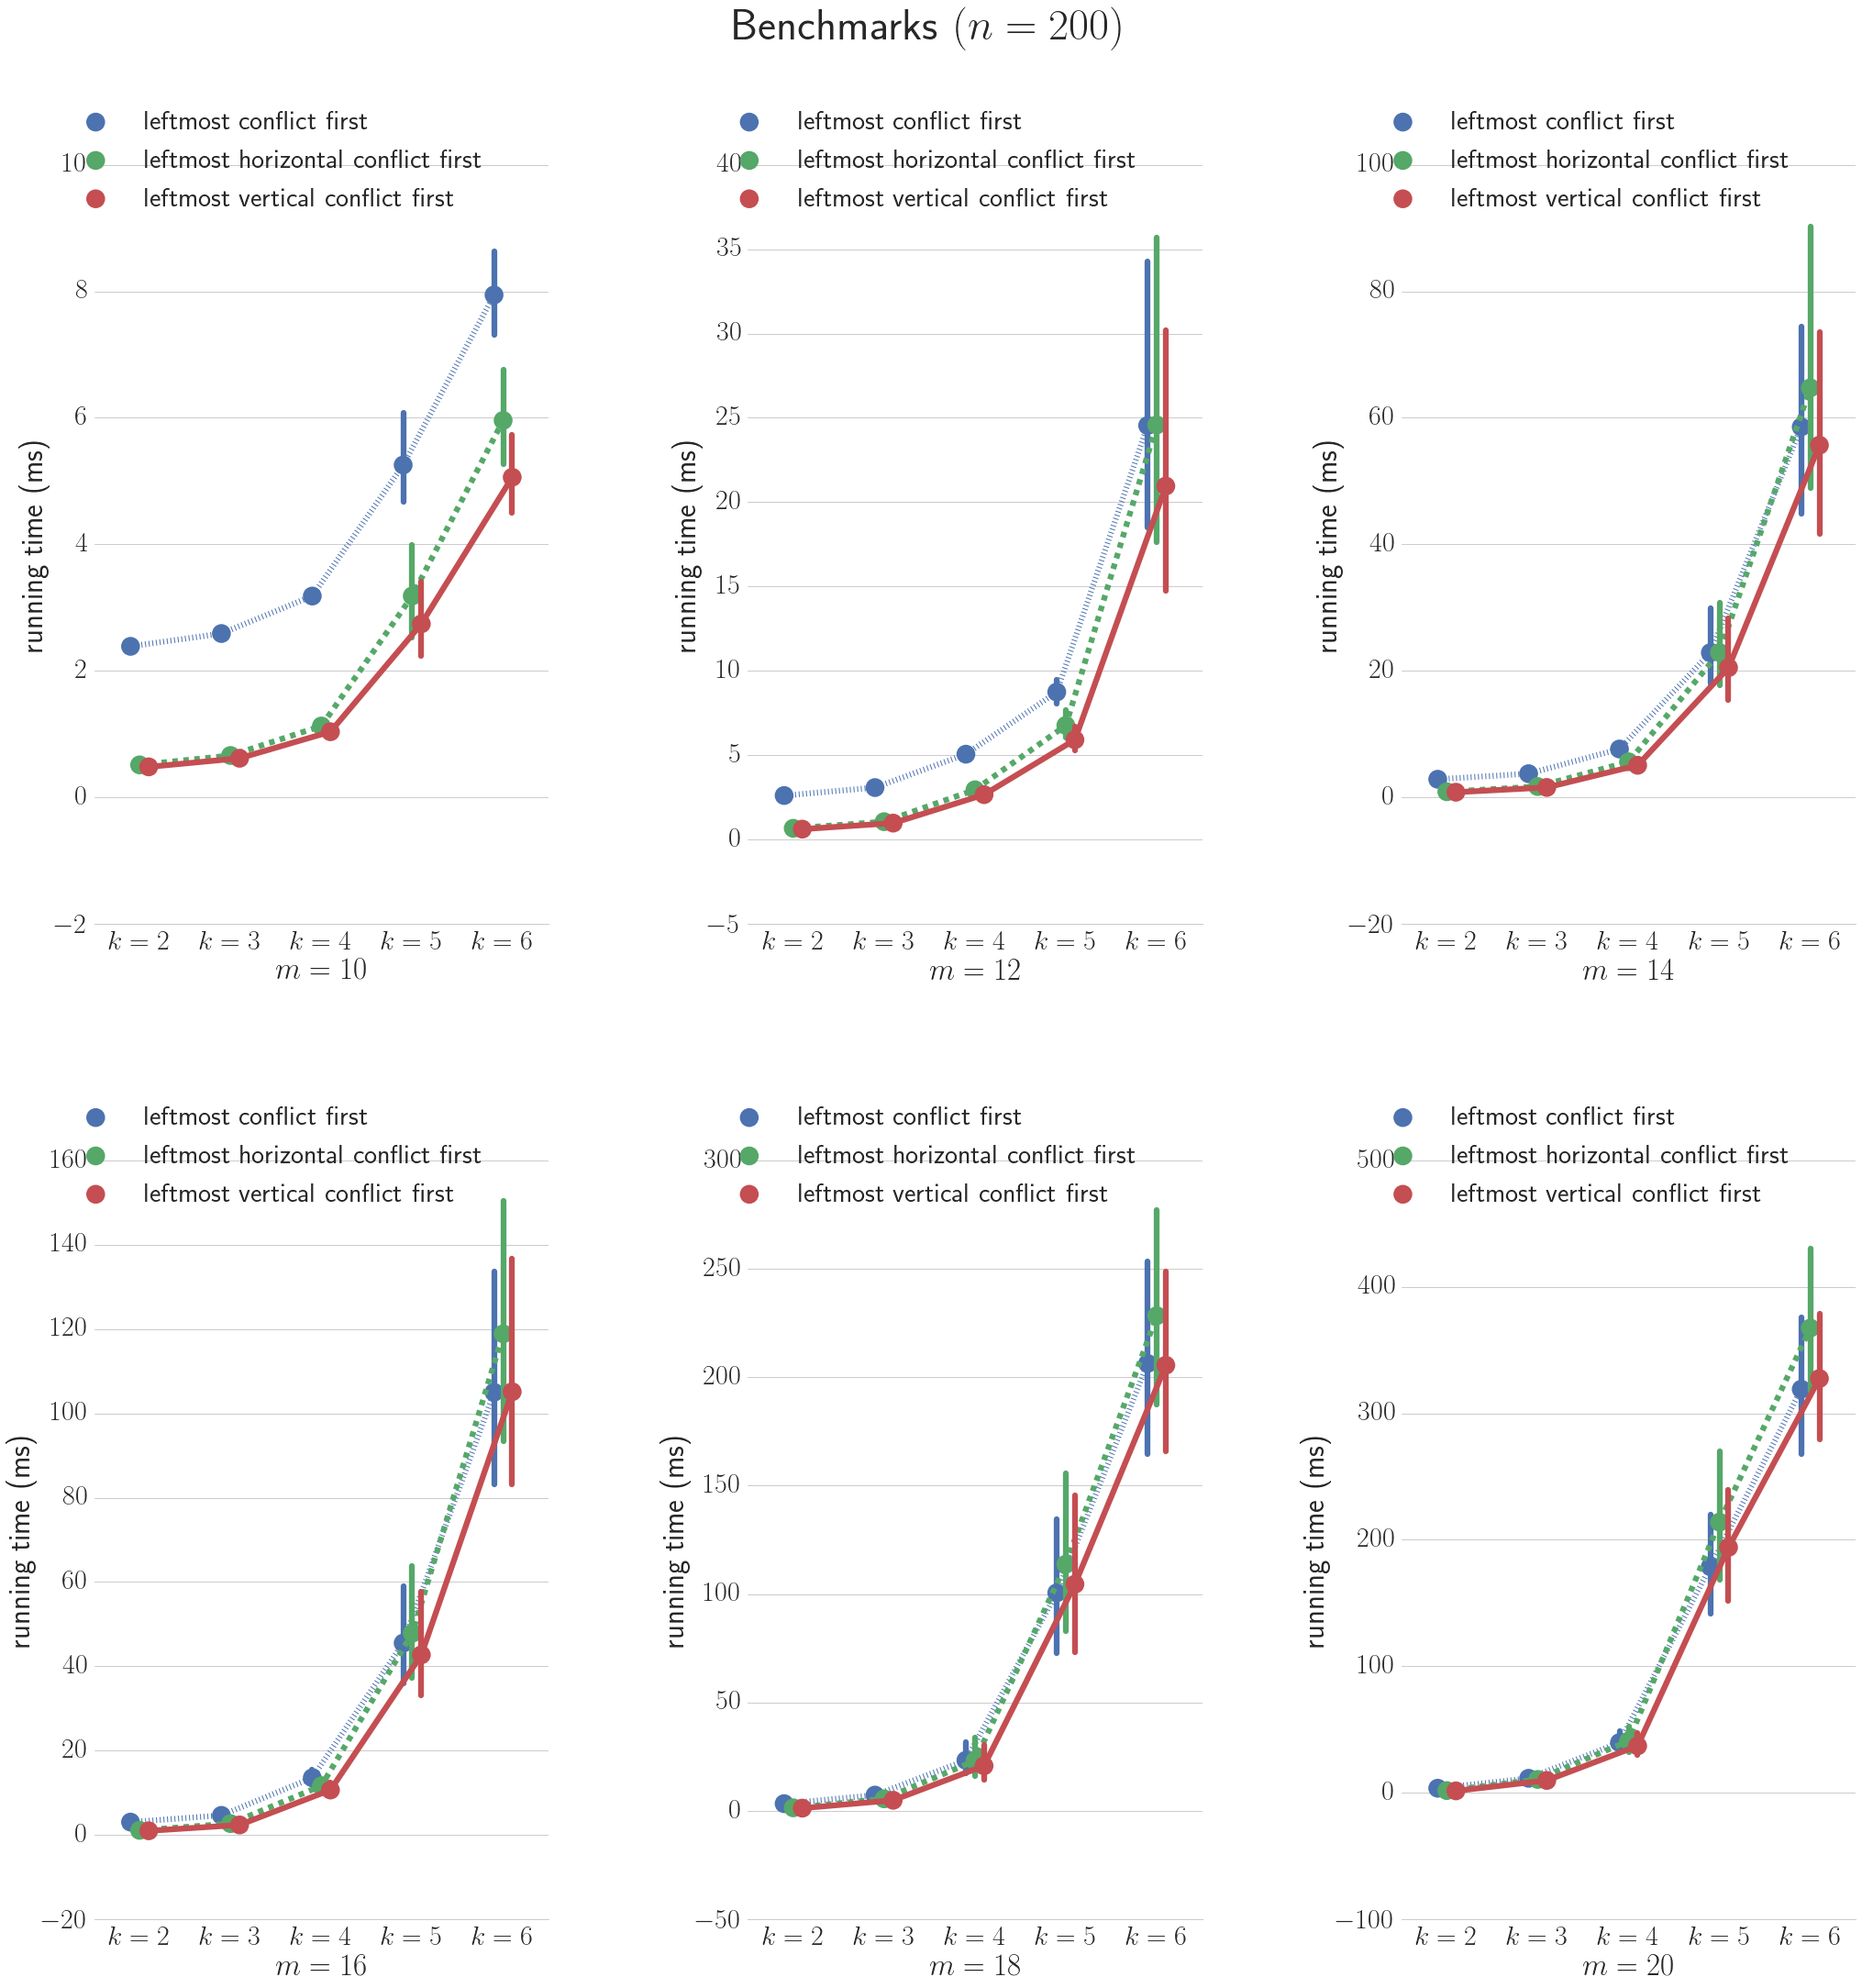

In [148]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['leftmost conflict first', 'leftmost horizontal conflict first', 'leftmost vertical conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.03)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, k)] for k in ks])
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="strategy", scale=2.,
                      dodge=.2, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])
        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.105), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-leftmost-conflict-first', str(m), str(n)])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [149]:
df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted([int(k) for k in df_complete.k.unique()])
print('k values={}'.format(k_values))

anova = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_excerpt = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost conflict first']
        df_leftmost_horizontal_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost horizontal conflict first']
        df_leftmost_vertical_conflict_first_group = df_excerpt.loc[df_excerpt['strategy'] == 'leftmost vertical conflict first']
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_leftmost_conflict_first_group['duration'].values,
                                       df_leftmost_horizontal_conflict_first_group['duration'].values, 
                                       df_leftmost_vertical_conflict_first_group['duration'].values
                                       )

m values=[10, 12, 14, 16, 18, 20]
k values=[2, 3, 4, 5, 6]


In [150]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=16, k=6, pvalue=0.15386213471201465
m=10, k=4, pvalue=1.73845903497515e-22
m=20, k=3, pvalue=0.9263788562825321
m=16, k=4, pvalue=0.5928580179613618
m=14, k=4, pvalue=0.8727638364022842
m=10, k=6, pvalue=3.4321877213666986e-05
m=16, k=2, pvalue=0.4148421083738191
m=14, k=6, pvalue=0.5660558347976983
m=12, k=5, pvalue=0.20199363128011427
m=18, k=6, pvalue=0.04739815877318765
m=20, k=5, pvalue=0.10862794290090405
m=18, k=3, pvalue=0.3901224244017867
m=14, k=2, pvalue=0.0030679682538281004
m=10, k=3, pvalue=1.8241722984510446e-211
m=12, k=2, pvalue=7.302494823843118e-159
m=10, k=5, pvalue=9.047577473623035e-07
m=16, k=5, pvalue=0.4427669120489105
m=14, k=5, pvalue=0.47379126051775333
m=20, k=2, pvalue=0.6580753380636422
m=16, k=3, pvalue=0.9072450517129588
m=18, k=2, pvalue=0.6088054913065803
m=18, k=4, pvalue=0.8256297472890799
m=12, k=6, pvalue=0.1294152769437068
m=12, k=4, pvalue=0.015654366501761996
m=20, k=6, pvalue=0.8973706569101629
m=14, k=3, pvalue=0.27304637666648557
m=20, k=4

In [151]:
print(anova_to_latex(anova))

\begin{tabular}{rrrrrr}
& \multicolumn{5}{c}{$k$}    \\\cline{2-6}
$m$\quad & 2 & 3 & 4 & 5 & 6 \\\cline{2-6} \cline{2-6}
10 \quad & 0.0 & 0.0 & 0.0 & 1e-06 & 3.4e-05\\\cline{2-6}
12 \quad & 0.0 & 0.0 & 0.015654 & 0.201994 & 0.129415\\\cline{2-6}
14 \quad & 0.003068 & 0.273046 & 0.872764 & 0.473791 & 0.566056\\\cline{2-6}
16 \quad & 0.414842 & 0.907245 & 0.592858 & 0.442767 & 0.153862\\\cline{2-6}
18 \quad & 0.608805 & 0.390122 & 0.82563 & 0.161299 & 0.047398\\\cline{2-6}
20 \quad & 0.658075 & 0.926379 & 0.437579 & 0.108628 & 0.897371\\\cline{2-6}
\end{tabular}
None


i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


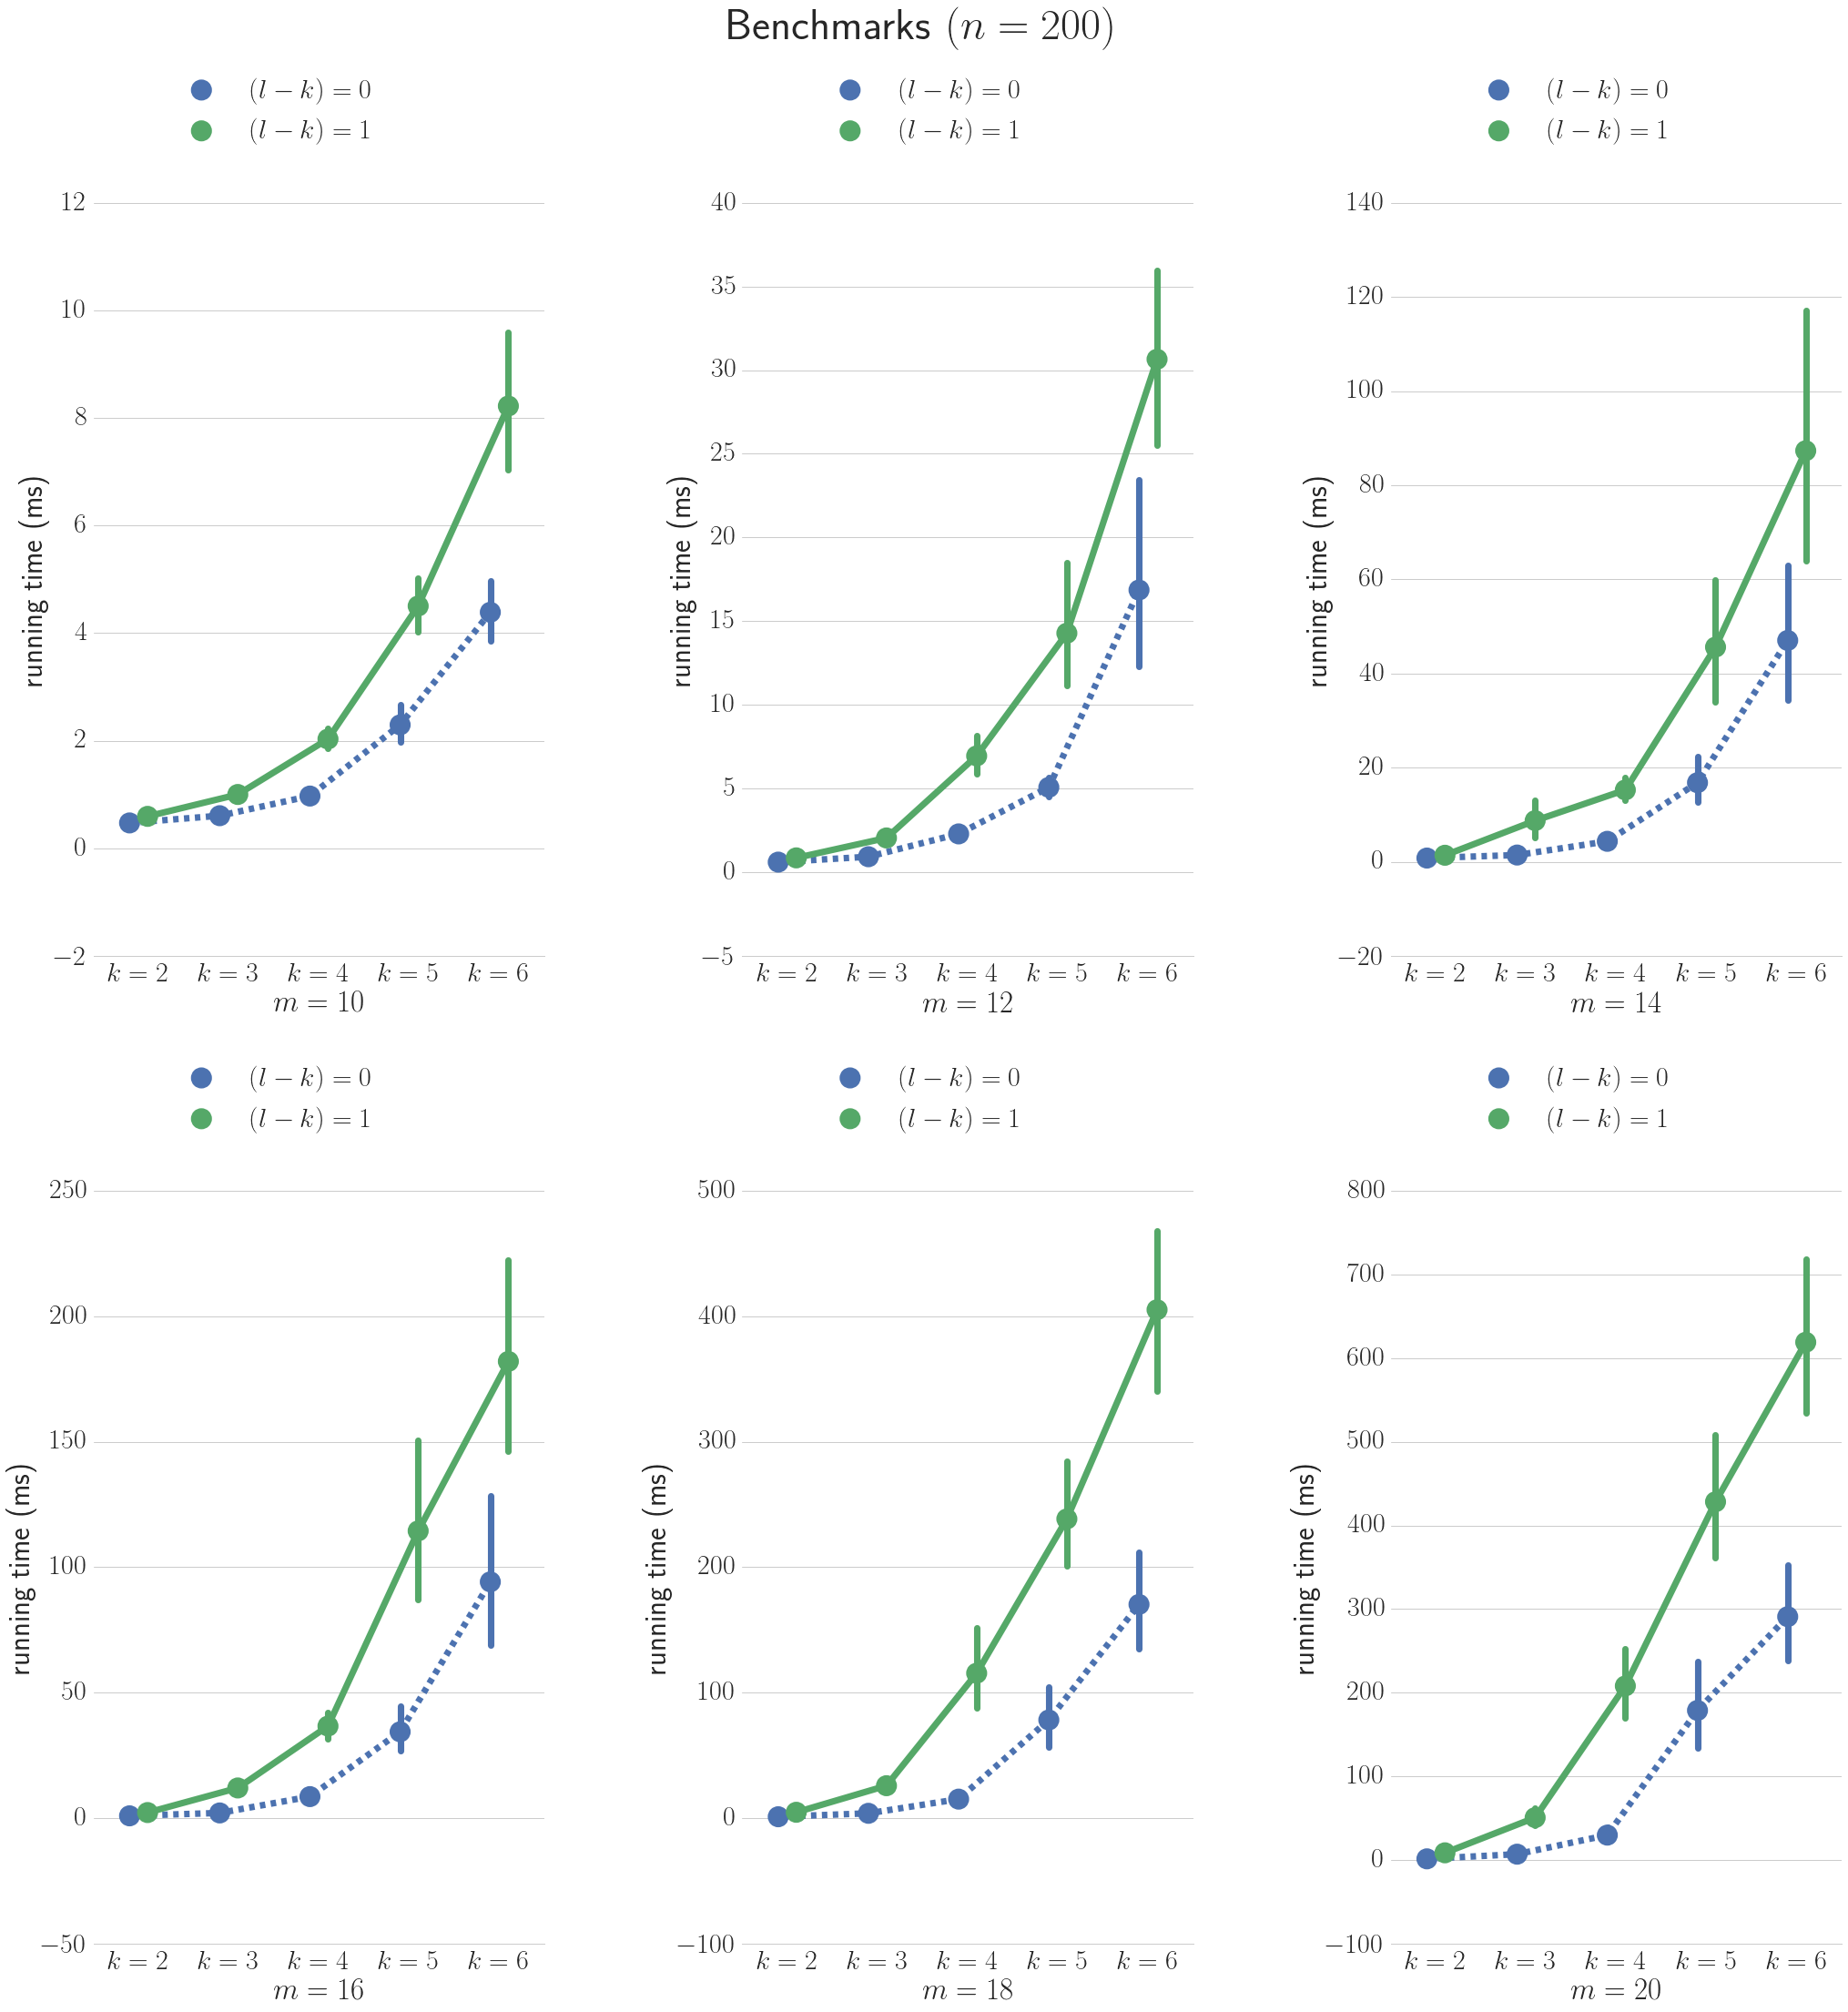

In [152]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['rightmost conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.05)
    
    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, str(l).zfill(2))] for k in ks for l in [k, str(int(k)+1)]])
        data['delta'] = data['l'].apply(lambda l: int(l)) - data['k'].apply(lambda k: int(k))
        data['delta'] = data['delta'].apply(lambda d: r'$(l - k) = {}$'.format(d))
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        #print(data)
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="delta", scale=2.25,
                      dodge=.2, join=True, markers=["o", "o"], linestyles=["--", "-"])

        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.2), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-rightmost-conflict-first-varying-l', m, n])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

i=0, j=0
i=0, j=1
i=0, j=2
i=1, j=0
i=1, j=1
i=1, j=2


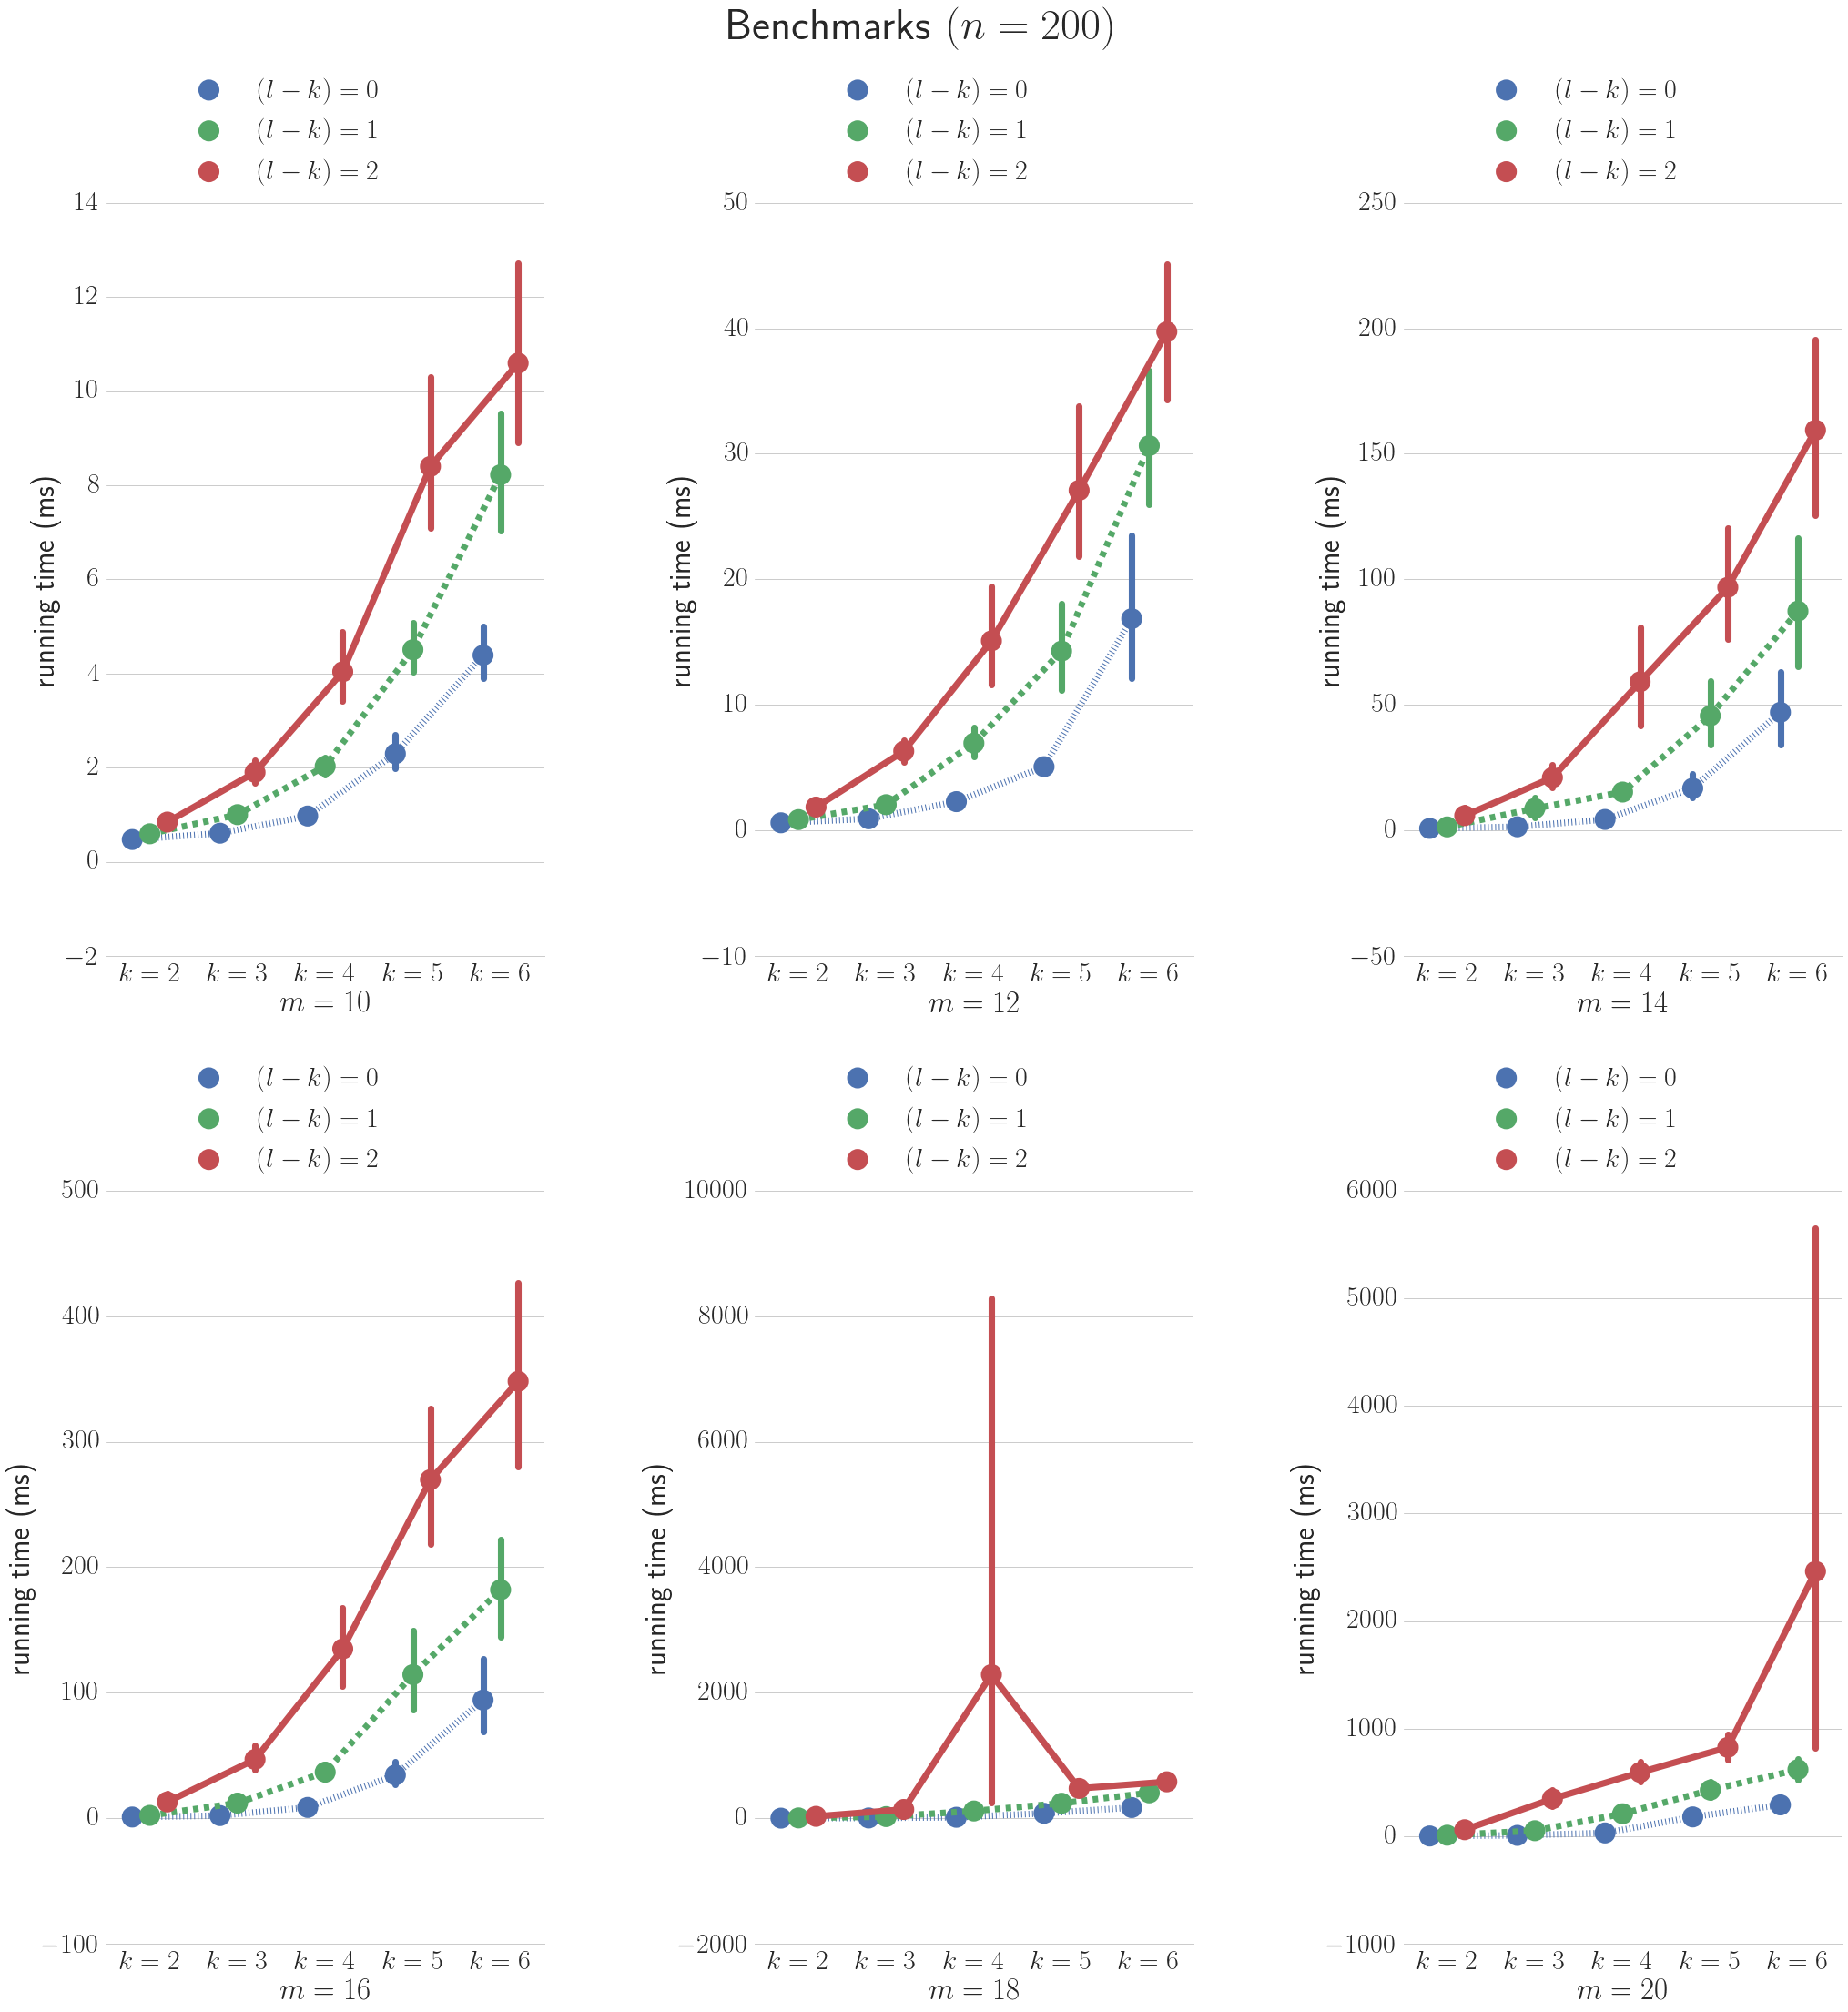

In [153]:
# row index
i=0
# column index
j=0

# allowed strategies
allowed_strategies = ['rightmost conflict first']

# plot
for n in ns:
    mpl.rcParams['figure.figsize'] = (30.0, 30.0)
    fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
    label_n = r'Benchmarks $(n={})$'.format(n)
    fig.suptitle(label_n, fontsize=48, y=1.05)

    df = {}
    for m in ms:
        print("i={}, j={}".format(i, j))
        data = pd.concat([df_benchmarks[(m, n, k, str(l).zfill(2))] for k in ks for l in [k, str(int(k)+1), str(int(k)+2)]])
        data['delta'] = data['l'].apply(lambda l: int(l)) - data['k'].apply(lambda k: int(k))
        data['delta'] = data['delta'].apply(lambda d: r'$(l - k) = {}$'.format(d))
        data['k'] = data['k'].apply(lambda k: r'$k = {}$'.format(k))
        # keep allowed strategies
        data = data.loc[data['strategy'].isin(allowed_strategies)]
        #print(data)
        sns.pointplot(ax=axes[i][j], data=data, x="k", y="duration", hue="delta", scale=2.25,
                      dodge=.4, join=True, markers=["o", "o", "o"], linestyles=[":", "--", "-"])

        label_m = r'$m={}$'.format(m)
        axes[i][j].set(xlabel = label_m, ylabel=r'running time (ms)')
        #if i!=0 or j!=0:
        #    axes[i][j].legend_.remove()
        #else:
        axes[i][j].legend(loc='upper center', bbox_to_anchor=(0.4,1.2), ncol=1, fancybox=True, shadow=True)
        j = j+1
        if j == 3:
            i = i+1
            j = 0
    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

    name = '-'.join(['benchmarks-rightmost-conflict-first-varying-l2', m, n])
    fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

# Random generation of $k$-split permutations

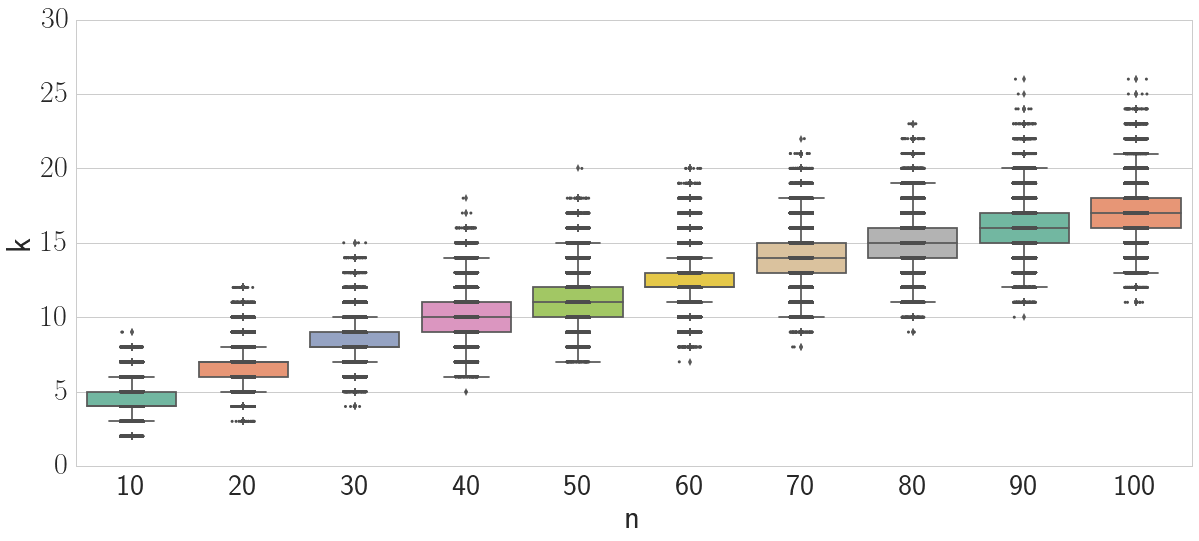

In [41]:
mpl.rcParams['figure.figsize'] = (20.0, 8.0)

df = pd.read_csv('../data/split-parameter-minsize-10-maxsize-100-stepsize-10.csv', names = ['n', 'k'])

ax = sns.plot(x="n", y="k", data=df, palette="Set2")
#ax = sns.boxplot(x="n", y="k", data=df, whis=np.inf, color="c")
stripplot = sns.stripplot(x="n", y="k", data=df, jitter=True, size=3, color=".3", linewidth=0)

fig = stripplot.get_figure()
fig.savefig('split-parameter-minsize-10-maxsize-100-stepsize-10.pdf', format='pdf', close=True, verbose=True, dpi=1200)

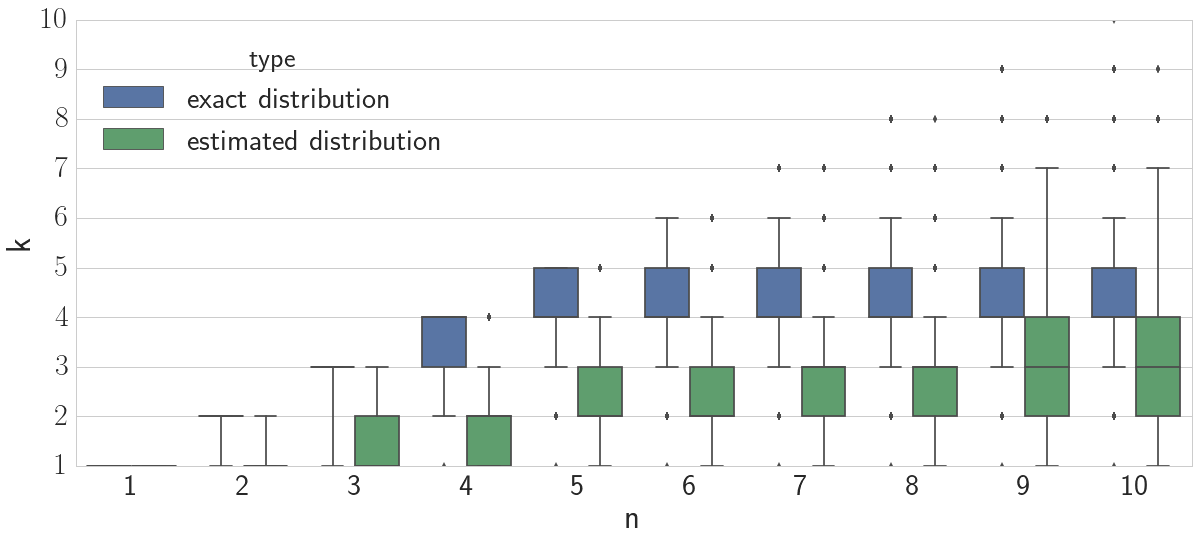

In [49]:
df = pd.read_csv('../data/distribution-size-10.csv', names = ['type', 'n', 'k'])

plot = sns.boxplot(x="n", y="k", hue="type", data=df)
fig = plot.get_figure()
fig.savefig("distribution-size-10.png")

##Random permutations##

In [154]:
all_df = []
for f in benchmark_files('ppattern-random-benchmark'):
    # parse cvs benchmark file
    #  m:         pattern size
    #  n:         permutation size
    #  p:         pattern
    #  q:         permutation
    #  embedding: solution
    #  strategy:  conflict selection strategy
    #  duration:  running time
    print(f)
    df = pd.read_csv("../data/" + f, names = ['m', 'n', 'p', 'pSplit', 'q', 'qSplit', 'embedding', 'strategy', 'duration'])
    
    # convert string int to int
    df['m'] = df['m'].apply(lambda m: string_to_int(m))
    df['n'] = df['n'].apply(lambda n: string_to_int(n))
    
    # time in ms
    df['duration'] = df['duration'].apply(lambda x: format_duration(x))
    
    # drop coumns
    df = df.drop('p', 1)
    df = df.drop('q', 1)
    df = df.drop('embedding', 1)
    df = df.drop('strategy', 1)

    # add to the list of all dataframes
    all_df.append(df)

# merge dataframes
df = pd.concat(all_df)

ppattern-random-benchmark-psize-10-qsize-100.csv
ppattern-random-benchmark-psize-10-qsize-150.csv
ppattern-random-benchmark-psize-10-qsize-200.csv
ppattern-random-benchmark-psize-5-qsize-100.csv
ppattern-random-benchmark-psize-5-qsize-150.csv
ppattern-random-benchmark-psize-5-qsize-200.csv
ppattern-random-benchmark-psize-6-qsize-100.csv
ppattern-random-benchmark-psize-6-qsize-150.csv
ppattern-random-benchmark-psize-6-qsize-200.csv
ppattern-random-benchmark-psize-7-qsize-100.csv
ppattern-random-benchmark-psize-7-qsize-150.csv
ppattern-random-benchmark-psize-7-qsize-200.csv
ppattern-random-benchmark-psize-8-qsize-100.csv
ppattern-random-benchmark-psize-8-qsize-150.csv
ppattern-random-benchmark-psize-8-qsize-200.csv
ppattern-random-benchmark-psize-9-qsize-100.csv
ppattern-random-benchmark-psize-9-qsize-150.csv
ppattern-random-benchmark-psize-9-qsize-200.csv


In [155]:
m_values = sorted(df.m.unique())
print(m_values)
n_values = sorted(df.n.unique())
print(n_values)

[5, 6, 7, 8, 9, 10]
[100, 150, 200]


In [156]:
# add delta column
df['delta'] = df['qSplit'].apply(lambda qSplit: int(qSplit)) - df['pSplit'].apply(lambda pSplit: int(pSplit))

ms    = []
ns    = []
corrs = []
for n in n_values:
    for m in m_values:
        ms.append(m)
        ns.append(n)
        data = df.loc[(df['m'] == m) & (df['n'] == n)]
        corrs.append(data['duration'].corr(data['delta']))
        
df_corr = pd.DataFrame({'m': ms, 'n': ns, 'corr': corrs})

saving Figure benchmark-random-permutations-mvalues-5-6-7-8-9-10-nvalues-100-150-200.pdf


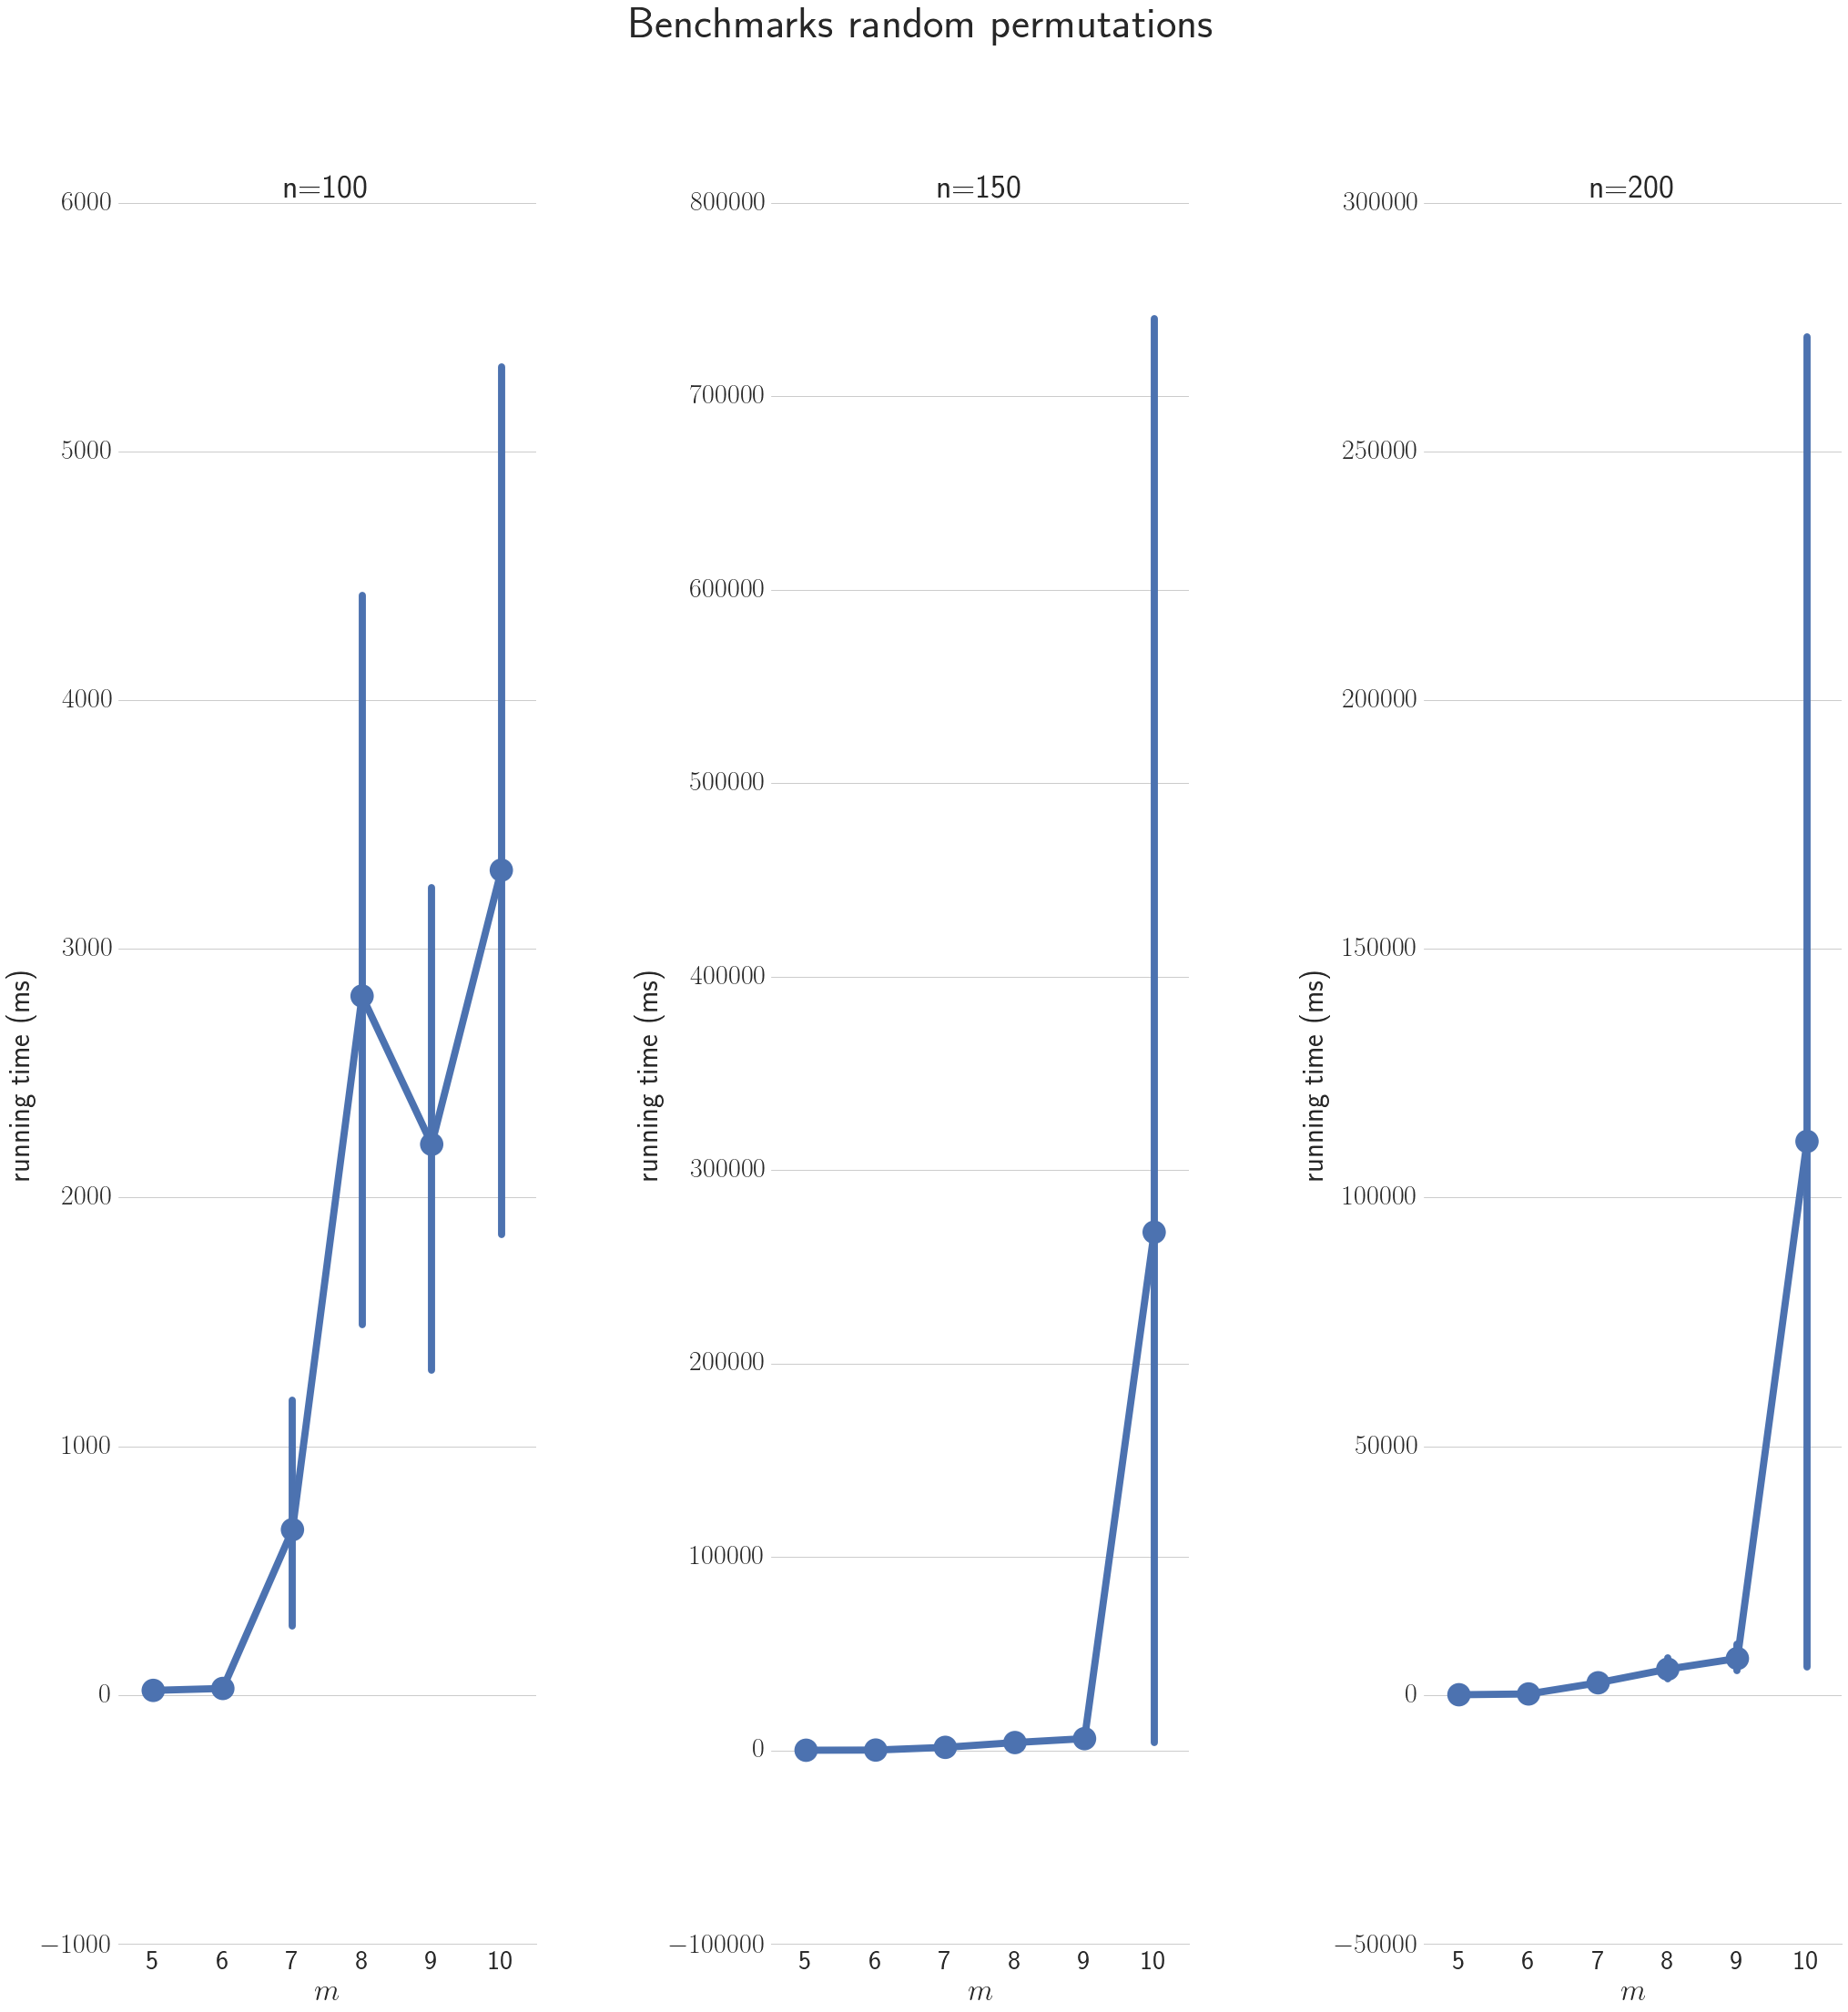

In [163]:


# row/column index
j=0

# plot
mpl.rcParams['figure.figsize'] = (30.0, 30.0)
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=False)
label_n = r'Benchmarks random permutations$'
fig.suptitle(label_n, fontsize=48, y=1.05)
for n in n_values:
    data = df.loc[df['n'] == n]
    sns.pointplot(ax=axes[j], data=data, x="m", y="duration", scale=2.5,
                  join=True, markers=["o"], linestyles="-")
    xlabel=r'$m$'
    ylabel=r'running time (ms)'
    axes[j].set(xlabel=xlabel, ylabel=ylabel)
    axes[j].set_title(r'n={}'.format(n))
    j = j+1

    sns.despine(left=True)
    plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
    fig.subplots_adjust(top=0.95)

name = '-'.join(['benchmark-random-permutations', 
                 'mvalues', '-'.join([str(m) for m in m_values]), 
                 'nvalues', '-'.join([str(n) for n in n_values])])
print("saving Figure {}".format(name+ '.pdf'))
fig.savefig(name + '.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [128]:
df = pd.read_csv('ppattern-estimate-split-10-100-2.csv', names = ['n', 'k'])

# distinct n
distinct_n = df.n.unique()
max_k = 8

print(distinct_n)
print(max_k)

t = {}
for n in distinct_n:
    t[n] = {}
    for k in range(1, max_k+1):
        t[n][k] = 0

for (_, row) in df.iterrows():
    n = row['n']
    k = int(row['k'])
    for j in range (k, max_k+1):
        t[n][j] += 1

for n in t:
    for k in t[n]:
        t[n][k] = float(t[n][k]) / 10000.0
        
t2 = {}
for n in t:
    for k in t[n]:
        if k not in t2:
            t2[k] = {} 
        t2[k][n] = t[n][k]
        

sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (12.0, 10.0)
mpl.rcParams.update({'font.size': 8})

axes = plt.gca()
axes.set_xlim(0, 110)
axes.set_ylim(-0.1, 1.1)

for k in sorted(t2.keys()):
    xs = list(sorted(t2[k].keys()))
    ys = [t2[k][n] for n in xs]
    plt.plot(xs, ys, 'b-', linewidth=4.0)

plt.savefig("ppattern-estimate-split-10-100-2.pdf", bbox_inches='tight')

OSError: File b'ppattern-estimate-split-10-100-2.csv' does not exist

## Comparing strategies

Statistical analysis of the benchmarks for 3 strategies: 
**leftmost order conflict first**, **leftmost value conflict first** and **leftmost conflict**.

1. **leftmost order conflict first**. For resolving conflicts, the leftmost order conflict w.r.t to $x$-coordinate is selected. If there is no order conflict, the leftmost value conflict w.r.t to $x$-coordinate is selected.
2. **leftmost value conflict first**. For resolving conflicts, the leftmost value conflict w.r.t to $x$-coordinate is selected. If there is no value conflict, the leftmost order conflict w.r.t to $x$-coordinate is selected.
3. **leftmost conflict**. For resolving conflicts, the leftmost conflict w.r.t to $x$-coordinate is selected (this conflict is either an order conflict or a value conflict).

In [167]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

df_complete = pd.concat([df_benchmarks[key] for key in df_benchmarks])

m_values   = sorted(df_complete.m.unique())
print('m values={}'.format(m_values))
k_values = sorted(df_complete.k.unique())
print('k values={}'.format(k_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for k in k_values:
        # select rows
        df_m_k = df_complete.loc[(df_complete['m'] == m) & (df_complete['k'] == k)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_k = df_m_k.loc[df_m_k['strategy'] == 'leftmost conflict']
        


        # assign
        df_details[(m,k)] = df_m_k
        df_leftmost_order_conflict_first[(m, k)] = df_leftmost_order_conflict_first_m_k['duration'].values
        df_leftmost_value_conflict_first[(m, k)] = df_leftmost_value_conflict_first_m_k['duration'].values
        df_leftmost_conflict[(m, k)] = df_leftmost_conflict_m_k['duration'].values
        
        # Perform the ANOVA
        anova[(m, k)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, k)], 
                                       df_leftmost_value_conflict_first[(m, k)],
                                       df_leftmost_conflict[(m, k)])

m values=[8, 10, 12, 14, 16, 18]
k values=[2, 4, 6, 8]


In [168]:
for (m, k) in anova:
    print("m={}, k={}, pvalue={}".format(m, k, anova[(m, k)][1]))

m=18, k=8, pvalue=0.5711461860272378
m=16, k=6, pvalue=0.726949910064542
m=16, k=8, pvalue=0.887774315288484
m=10, k=4, pvalue=7.365822237256172e-84
m=18, k=2, pvalue=8.99150394735824e-161
m=14, k=4, pvalue=0.00043494483403562625
m=10, k=6, pvalue=0.026438845265509235
m=16, k=2, pvalue=1.3658651629066387e-193
m=14, k=6, pvalue=0.55566021749566
m=18, k=6, pvalue=0.4092916108182827
m=12, k=4, pvalue=1.8185812830190133e-09
m=12, k=2, pvalue=0.0
m=14, k=2, pvalue=2.3500407253526693e-249
m=8, k=2, pvalue=0.0
m=10, k=8, pvalue=0.7041734087447162
m=16, k=4, pvalue=0.2677138101468426
m=18, k=4, pvalue=0.7371445831575976
m=12, k=6, pvalue=0.6154446494268735
m=10, k=2, pvalue=0.0
m=8, k=8, pvalue=6.954863824392422e-07
m=8, k=6, pvalue=2.4095330463753686e-23
m=8, k=4, pvalue=0.0
m=14, k=8, pvalue=0.5066567170177815
m=12, k=8, pvalue=0.07571959566257769


## Brenchmarking pattern matching for $321$-avoiding permutations

In [58]:
# read csv benchmark file
df_321_benchmarks = pd.read_csv('ppattern-321-avoiding-benchmark-8-18-100-600.csv', 
                                names = ['m', 'n', 'k', 'p', 'q', 'strategy', 'embedding', 'duration'])
        
# time in ms
df_321_benchmarks['duration'] = df_321_benchmarks['duration'].apply(lambda x: format(x))
    
# drop p column
df_321_benchmarks = df_321_benchmarks.drop('p', 1)
    
# drop q column
df_321_benchmarks = df_321_benchmarks.drop('q', 1)
    
# drop embedding column
df_321_benchmarks = df_321_benchmarks.drop('embedding', 1)

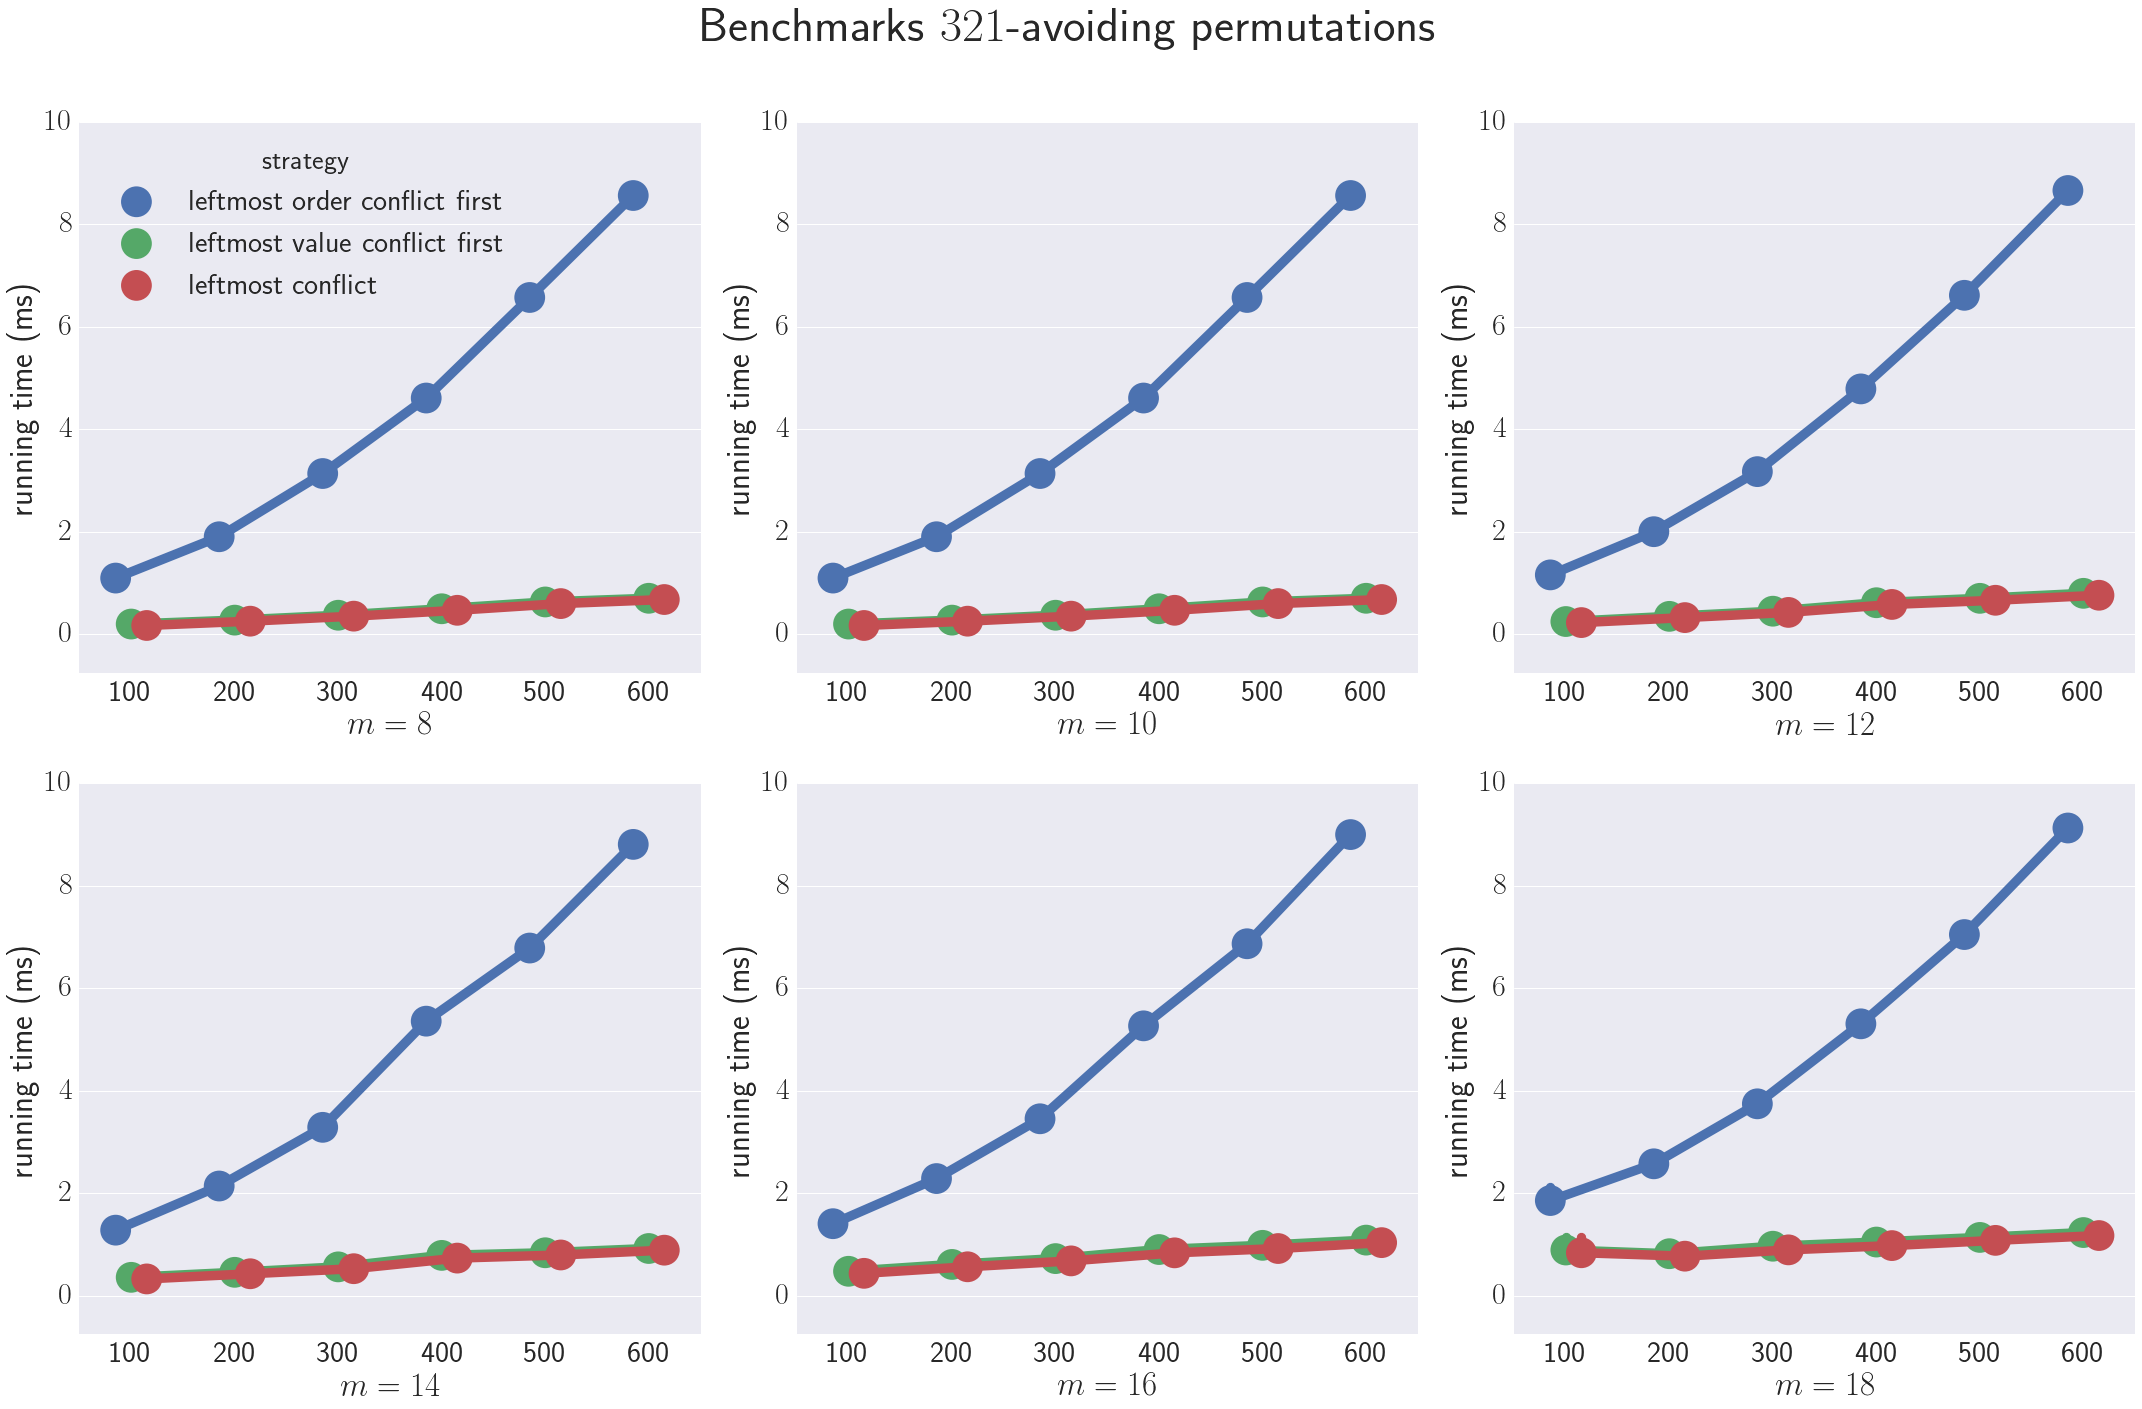

In [96]:
mpl.rcParams['figure.figsize'] = (30.0, 20.0)
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=False)
fig.suptitle(r'Benchmarks $321$-avoiding permutations', fontsize=48)

df_321_benchmarks_8 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][0], data=df_321_benchmarks_8, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][0].set(xlabel = r'$m=8$', ylabel=r'running time (ms)')
#axes[0][0].legend_.remove()
axes[0][0].set_ylim(-0.75,)

df_321_benchmarks_10 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 10]
sns.pointplot(ax=axes[0][1], data=df_321_benchmarks_10, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][1].set(xlabel = r'$m=10$', ylabel=r'running time (ms)')
axes[0][1].legend_.remove()
axes[0][1].set_ylim(-0.75,)

df_321_benchmarks_12 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 12]
sns.pointplot(ax=axes[0][2], data=df_321_benchmarks_12, x="n", y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[0][2].set(xlabel = r'$m=12$', ylabel=r'running time (ms)')
axes[0][2].legend_.remove()
axes[0][2].set_ylim(-0.75,)

df_321_benchmarks_14 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 14]
sns.pointplot(ax=axes[1][0], data=df_321_benchmarks_14, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][0].set(xlabel = r'$m=14$', ylabel=r'running time (ms)')
axes[1][0].legend_.remove()
axes[1][0].set_ylim(-0.75,)

df_321_benchmarks_16 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 16]
sns.pointplot(ax=axes[1][1], data=df_321_benchmarks_16, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][1].set(xlabel = r'$m=16$', ylabel=r'running time (ms)')
axes[1][1].legend_.remove()
axes[1][1].set_ylim(-0.75,)

df_321_benchmarks_18 = df_321_benchmarks.loc[df_321_benchmarks['m'] == 18]
sns.pointplot(ax=axes[1][2], data=df_321_benchmarks_18, x='n', y='duration', hue='strategy', scale=3.0,
              dodge=.3, join=True, markers=['o', 'o', 'o'], linestyles=['-', '-', '-'])
axes[1][2].set(xlabel = r'$m=18$', ylabel=r'running time (ms)')
axes[1][2].legend_.remove()
axes[1][2].set_ylim(-0.75,)

sns.despine(left=True) 
plt.tight_layout(pad=2., w_pad=3.0, h_pad=5.0)
fig.subplots_adjust(top=0.9)

fig.savefig('ppattern-benchmarks-321-avoiding.pdf', format='pdf', close=True, verbose=True, dpi=1200)

In [97]:
strategies = ['leftmost order conflict first', 'leftmost value conflict first', 'leftmost conflict']

m_values   = sorted(df_321_benchmarks.m.unique())
print('m values={}'.format(m_values))
n_values = sorted(df_321_benchmarks.n.unique())
print('n values={}'.format(n_values))

df_details = {}
df_leftmost_order_conflict_first = {}
df_leftmost_value_conflict_first = {}
df_leftmost_conflict = {}
anova = {}
groups = {}
for m in m_values:
    for n in n_values:
        # select rows
        df_m_n = df_321_benchmarks.loc[(df_321_benchmarks['m'] == m) & (df_321_benchmarks['n'] == n)]
        
        # extract individual stategy groups
        df_leftmost_order_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost order conflict first']
        df_leftmost_value_conflict_first_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost value conflict first']
        df_leftmost_conflict_m_n = df_m_n.loc[df_m_n['strategy'] == 'leftmost conflict']
        
        # assign
        df_details[(m, n)] = df_m_n
        df_leftmost_order_conflict_first[(m, n)] = df_leftmost_order_conflict_first_m_n['duration'].values
        df_leftmost_value_conflict_first[(m, n)] = df_leftmost_value_conflict_first_m_n['duration'].values
        df_leftmost_conflict[(m, n)] = df_leftmost_conflict_m_n['duration'].values
        
        # Perform the ANOVA
        anova[(m, n)] = stats.f_oneway(df_leftmost_order_conflict_first[(m, n)], 
                                       df_leftmost_value_conflict_first[(m, n)],
                                       df_leftmost_conflict[(m, n)])

m values=[8, 10, 12, 14, 16, 18]
n values=[100, 200, 300, 400, 500, 600]


In [98]:
anova

{(8, 100): F_onewayResult(statistic=19129.069407245192, pvalue=0.0),
 (8, 200): F_onewayResult(statistic=19682.832053031965, pvalue=0.0),
 (8, 300): F_onewayResult(statistic=22134.562733128732, pvalue=0.0),
 (8, 400): F_onewayResult(statistic=19192.25959862825, pvalue=0.0),
 (8, 500): F_onewayResult(statistic=25226.672128700076, pvalue=0.0),
 (8, 600): F_onewayResult(statistic=22038.143676015119, pvalue=0.0),
 (10, 100): F_onewayResult(statistic=13791.624725457968, pvalue=0.0),
 (10, 200): F_onewayResult(statistic=17207.947715924503, pvalue=0.0),
 (10, 300): F_onewayResult(statistic=16433.96620462451, pvalue=0.0),
 (10, 400): F_onewayResult(statistic=20725.600032967723, pvalue=0.0),
 (10, 500): F_onewayResult(statistic=17956.672174959593, pvalue=0.0),
 (10, 600): F_onewayResult(statistic=26525.856890026345, pvalue=0.0),
 (12, 100): F_onewayResult(statistic=8275.0613005522173, pvalue=0.0),
 (12, 200): F_onewayResult(statistic=11669.023035152324, pvalue=0.0),
 (12, 300): F_onewayResult(s

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

for m in m_values:
    for n in n_values:
        tukey = pairwise_tukeyhsd(endog=df_m_n['duration'],     # Data
                                  groups=df_m_n['strategy'],   # Groups
                                  alpha=0.05)          # Significance level

        #tukey.plot_simultaneous()    # Plot group confidence intervals
        #plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")
    
        print("m={}, n={}".format(m, n))
        print(tukey.summary())

m=8, n=100
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict first  7.9542   7.8333  8.075   True 
      leftmost conflict       leftmost value conflict first  0.0585  -0.0624  0.1793 False 
leftmost order conflict first leftmost value conflict first -7.8957  -8.0166 -7.7748  True 
-------------------------------------------------------------------------------------------
m=8, n=200
                     Multiple Comparison of Means - Tukey HSD,FWER=0.05                    
            group1                        group2            meandiff  lower   upper  reject
-------------------------------------------------------------------------------------------
      leftmost conflict       leftmost order conflict firs